<a href="https://colab.research.google.com/github/FatihMercan61/Deep-Learning-In-Production/blob/master/Bachelor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# falls zip datei hochgeladen werden soll
!unzip /content/drive/MyDrive/Einpressen_csv_to_zip.zip -d "/"

Archive:  /content/drive/MyDrive/Einpressen_csv_to_zip.zip
  inflating: /Einpressen_csv_to_zip.CSV  


# Einleitung

In [ ]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#nicht von zip datei
#df = pd.read_csv("/content/drive/MyDrive/Data/Einpressen.CSV")

# von zip datei
df = pd.read_csv("/Einpressen_csv_to_zip.CSV")

In [ ]:
df.head()

,CurveId,CycleId,ProgramName,CycleDate,Kategorie,Unterkategorie,Kategorienummer,StepNo,SignalYName,IsY2,...,231.2,231.3,231.4,231.5,231.6,231.7,231.8,231.9,232,232.1
0,2627,1769,BA_Oberhof_adapter.prg,06.10.2020 10:33,Referenz,Referenz,0,3,Kraft,FALSCH,...,3.858200,3.849101,3.849101,3.849101,3.840000,3.840000,3.840000,3.858200,3.867400,3.8674
1,2629,1770,BA_Oberhof_adapter.prg,06.10.2020 10:36,Referenz,Referenz,0,3,Kraft,FALSCH,...,4.706504,4.697400,4.688296,4.688296,4.660895,4.624399,4.569695,4.496704,4.314304,4.3052
2,2631,1771,BA_Oberhof_adapter.prg,06.10.2020 10:38,Referenz,Referenz,0,3,Kraft,FALSCH,...,4.624400,4.624400,4.624400,4.624400,4.615300,4.606200,4.578799,4.606200,4.551400,4.5514
3,2633,1772,BA_Oberhof_adapter.prg,06.10.2020 10:40,Referenz,Referenz,0,3,Kraft,FALSCH,...,4.770400,4.761199,4.752102,4.761199,4.733903,4.697399,4.633502,4.542301,4.332500,4.3325
4,2635,1773,BA_Oberhof_adapter.prg,06.10.2020 10:43,Referenz,Referenz,0,3,Kraft,FALSCH,...,3.511598,3.493402,3.484300,3.475202,3.466002,3.456899,3.447801,3.438698,3.429498,3.4204


In [ ]:
# lösche unnötige spalten
df = df.drop(labels = ["CurveId","CycleId", "ProgramName","CycleDate","SignalYName","StepNo","IsY2","CurveType", "Points"],axis=1)
df.head()

,Kategorie,Unterkategorie,Kategorienummer,200,200.1,200.2,200.3,200.4,200.5,200.6,...,231.2,231.3,231.4,231.5,231.6,231.7,231.8,231.9,232,232.1
0,Referenz,Referenz,0,0.0091,0.0182,0.0182,0.0182,0.0182,0.0182,0.0182,...,3.858200,3.849101,3.849101,3.849101,3.840000,3.840000,3.840000,3.858200,3.867400,3.8674
1,Referenz,Referenz,0,0.0091,0.0182,0.0091,0.0091,0.0091,0.0182,0.0182,...,4.706504,4.697400,4.688296,4.688296,4.660895,4.624399,4.569695,4.496704,4.314304,4.3052
2,Referenz,Referenz,0,0.0182,0.0182,0.0182,0.0182,0.0091,0.0091,0.0091,...,4.624400,4.624400,4.624400,4.624400,4.615300,4.606200,4.578799,4.606200,4.551400,4.5514
3,Referenz,Referenz,0,0.0182,0.0182,0.0091,0.0091,0.0182,0.0182,0.0091,...,4.770400,4.761199,4.752102,4.761199,4.733903,4.697399,4.633502,4.542301,4.332500,4.3325
4,Referenz,Referenz,0,0.0091,0.0182,0.0091,0.0182,0.0091,0.0182,0.0182,...,3.511598,3.493402,3.484300,3.475202,3.466002,3.456899,3.447801,3.438698,3.429498,3.4204


In [ ]:
df.describe()

,Kategorienummer,200,200.1,200.2,200.3,200.4,200.5,200.6,200.7,200.8,...,231.2,231.3,231.4,231.5,231.6,231.7,231.8,231.9,232,232.1
count,360.000000,3.600000e+02,3.600000e+02,3.600000e+02,3.600000e+02,3.600000e+02,3.600000e+02,3.600000e+02,3.600000e+02,3.600000e+02,...,360.000000,360.000000,360.000000,360.000000,360.000000,360.000000,360.000000,360.000000,360.000000,360.000000
mean,4.700000,9.330819e-03,9.175540e-03,8.848874e-03,9.023874e-03,8.849153e-03,8.618596e-03,8.411650e-03,8.694985e-03,8.340541e-03,...,4.171141,4.163214,4.153306,4.146158,4.126273,4.090901,4.043168,3.975673,3.809362,3.801028
std,4.366114,1.088375e-02,1.068972e-02,1.110774e-02,1.103464e-02,1.099856e-02,1.125670e-02,1.107693e-02,1.110248e-02,1.093578e-02,...,0.677251,0.676803,0.676585,0.676843,0.674477,0.667034,0.655621,0.639312,0.603601,0.602887
min,0.000000,-1.830000e-02,-1.830000e-02,-1.830000e-02,-1.830000e-02,-1.830000e-02,-1.830000e-02,-1.830000e-02,-1.830000e-02,-1.830000e-02,...,2.672498,2.663397,2.663397,2.663397,2.654296,2.645103,2.617800,2.581301,2.480900,2.480900
25%,1.000000,5.808360e-10,5.808360e-10,4.869648e-10,5.808360e-10,5.808360e-10,2.053510e-10,2.053510e-10,4.869648e-10,2.053510e-10,...,3.719122,3.710025,3.700849,3.689527,3.673526,3.646198,3.593698,3.520798,3.393103,3.381625
50%,3.500000,1.819995e-02,9.099990e-03,9.099990e-03,9.099990e-03,9.099990e-03,9.099990e-03,9.099990e-03,9.099990e-03,9.099990e-03,...,4.131901,4.127302,4.118198,4.104503,4.086251,4.045251,4.004150,3.935752,3.776199,3.767100
75%,8.250000,1.819998e-02,1.819998e-02,1.819998e-02,1.819998e-02,1.819998e-02,1.819998e-02,1.819998e-02,1.819998e-02,1.819998e-02,...,4.608475,4.601654,4.592521,4.581077,4.560600,4.524026,4.473878,4.396399,4.214000,4.207075
max,13.000000,2.739999e-02,2.739999e-02,2.739999e-02,2.739999e-02,2.739999e-02,2.739999e-02,2.739999e-02,2.739999e-02,2.739999e-02,...,7.232997,7.232997,7.223904,7.223904,7.196497,7.114498,7.014102,6.859102,6.539800,6.539800


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 360 entries, 0 to 359
Columns: 325 entries, Kategorie to 232.1
dtypes: float64(322), int64(1), object(2)
memory usage: 914.2+ KB


Aufteilen in Feature und Target data

In [ ]:
X = df.iloc[:,3:]
y = df["Kategorie"].copy()
X

,200,200.1,200.2,200.3,200.4,200.5,200.6,200.7,200.8,200.9,...,231.2,231.3,231.4,231.5,231.6,231.7,231.8,231.9,232,232.1
0,0.0091,0.0182,0.0182,0.0182,0.0182,0.0182,0.0182,0.0182,0.0091,0.0091,...,3.858200,3.849101,3.849101,3.849101,3.840000,3.840000,3.840000,3.858200,3.867400,3.8674
1,0.0091,0.0182,0.0091,0.0091,0.0091,0.0182,0.0182,0.0182,0.0091,0.0182,...,4.706504,4.697400,4.688296,4.688296,4.660895,4.624399,4.569695,4.496704,4.314304,4.3052
2,0.0182,0.0182,0.0182,0.0182,0.0091,0.0091,0.0091,0.0091,0.0091,0.0091,...,4.624400,4.624400,4.624400,4.624400,4.615300,4.606200,4.578799,4.606200,4.551400,4.5514
3,0.0182,0.0182,0.0091,0.0091,0.0182,0.0182,0.0091,0.0182,0.0182,0.0091,...,4.770400,4.761199,4.752102,4.761199,4.733903,4.697399,4.633502,4.542301,4.332500,4.3325
4,0.0091,0.0182,0.0091,0.0182,0.0091,0.0182,0.0182,0.0182,0.0091,0.0091,...,3.511598,3.493402,3.484300,3.475202,3.466002,3.456899,3.447801,3.438698,3.429498,3.4204
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355,0.0091,0.0091,0.0183,0.0183,0.0183,0.0183,0.0183,0.0183,0.0091,0.0091,...,3.821806,3.803501,3.776197,3.757892,3.739697,3.685001,3.621109,3.511697,3.283608,3.2745
356,0.0091,0.0091,0.0183,0.0091,0.0183,0.0091,0.0183,0.0183,0.0183,0.0183,...,4.058900,4.049803,4.022398,4.013302,3.986001,3.949500,3.894702,3.830899,3.657604,3.6394
357,0.0183,0.0091,0.0183,0.0091,0.0091,0.0183,0.0091,0.0183,0.0091,0.0091,...,4.460306,4.442005,4.432896,4.423799,4.396401,4.350798,4.296098,4.214000,4.013297,4.0042
358,0.0091,0.0091,0.0183,0.0183,0.0183,0.0091,0.0183,0.0183,0.0183,0.0091,...,4.843297,4.843297,4.834200,4.843297,4.825103,4.788596,4.752097,4.679203,4.524102,4.5059


In [ ]:
y # wird später encoded sodass jede Kategorie eine zahl erhält

0                     Referenz
1                     Referenz
2                     Referenz
3                     Referenz
4                     Referenz
                ...           
355    UnzureichendeVerklebung
356    UnzureichendeVerklebung
357    UnzureichendeVerklebung
358    UnzureichendeVerklebung
359    UnzureichendeVerklebung
Name: Kategorie, Length: 360, dtype: object

In [ ]:
X_data = df.iloc[:,145:]
X_data

,214.2,214.3,214.4,214.5,214.6,214.7,214.8,214.9,215,215.1,...,231.2,231.3,231.4,231.5,231.6,231.7,231.8,231.9,232,232.1
0,0.009100,0.009100,0.018197,0.009100,0.009100,0.009100,0.009100,0.018197,0.018197,0.018197,...,3.858200,3.849101,3.849101,3.849101,3.840000,3.840000,3.840000,3.858200,3.867400,3.8674
1,0.009081,0.009081,0.009081,0.009081,0.009081,0.009081,0.009081,0.009081,0.009081,0.009081,...,4.706504,4.697400,4.688296,4.688296,4.660895,4.624399,4.569695,4.496704,4.314304,4.3052
2,0.018212,0.009100,0.009100,0.009100,0.009100,0.018212,0.009100,0.018212,0.018212,0.009100,...,4.624400,4.624400,4.624400,4.624400,4.615300,4.606200,4.578799,4.606200,4.551400,4.5514
3,0.009100,0.009100,0.018177,0.009100,0.018177,0.009100,0.018177,0.018177,0.009100,0.009100,...,4.770400,4.761199,4.752102,4.761199,4.733903,4.697399,4.633502,4.542301,4.332500,4.3325
4,0.009100,0.009100,0.009100,0.009100,0.009100,0.009100,0.009100,0.018207,0.009100,0.009100,...,3.511598,3.493402,3.484300,3.475202,3.466002,3.456899,3.447801,3.438698,3.429498,3.4204
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355,0.018315,0.018315,0.009100,0.009100,0.018315,0.009100,0.018315,0.018315,0.009100,0.018315,...,3.821806,3.803501,3.776197,3.757892,3.739697,3.685001,3.621109,3.511697,3.283608,3.2745
356,0.018319,0.009100,0.009100,0.009100,0.009100,0.009100,0.018319,0.018319,0.018319,0.009100,...,4.058900,4.049803,4.022398,4.013302,3.986001,3.949500,3.894702,3.830899,3.657604,3.6394
357,0.018278,0.018278,0.018278,0.009100,0.009100,0.009100,0.009100,0.009100,0.018278,0.009100,...,4.460306,4.442005,4.432896,4.423799,4.396401,4.350798,4.296098,4.214000,4.013297,4.0042
358,0.018278,0.018278,0.009100,0.009100,0.018278,0.009100,0.018278,0.009100,0.009100,0.009100,...,4.843297,4.843297,4.834200,4.843297,4.825103,4.788596,4.752097,4.679203,4.524102,4.5059


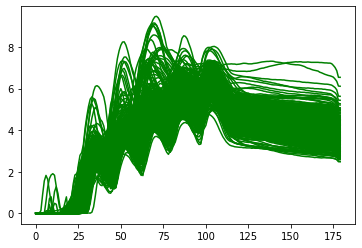

In [ ]:
# maximale Datapoints pro Graph ist 322
# 143 sollen weggestrichen werde --> 322 - 142 = 180 datapoints werden gezeichnet --> 322 und 142 beginnen beide von Null
def plot_graphen(dataframe = X_data , x_range = 180, color = "g", label=None):
    x_achse = np.arange(x_range)
    y_achse = dataframe.astype(float)
    y_achse = np.array(y_achse).T
    plt.plot(x_achse, y_achse, c = color, label = label)
    
plot_graphen()

Farbe des Graphen je nach Kategorie(= referenz, geölter Stift ...)

In [ ]:
referenz = df.loc[df["Kategorie"]=="Referenz"].iloc[:,145:]
geölter_stift = df.loc[df["Kategorie"]=="GeoelterStift"].iloc[:,145:]
versatz = df.loc[df["Kategorie"]=="Versatz"].iloc[:,145:]
gebohrt = df.loc[df["Kategorie"]=="Gebohrt"].iloc[:,145:]
unzureichende_verklebung= df.loc[df["Kategorie"]=="UnzureichendeVerklebung"].iloc[:,145:]
referenz

,214.2,214.3,214.4,214.5,214.6,214.7,214.8,214.9,215,215.1,...,231.2,231.3,231.4,231.5,231.6,231.7,231.8,231.9,232,232.1
0,0.009100,0.009100,0.018197,0.009100,0.009100,0.009100,0.009100,0.018197,0.018197,0.018197,...,3.858200,3.849101,3.849101,3.849101,3.840000,3.840000,3.840000,3.858200,3.867400,3.867400
1,0.009081,0.009081,0.009081,0.009081,0.009081,0.009081,0.009081,0.009081,0.009081,0.009081,...,4.706504,4.697400,4.688296,4.688296,4.660895,4.624399,4.569695,4.496704,4.314304,4.305200
2,0.018212,0.009100,0.009100,0.009100,0.009100,0.018212,0.009100,0.018212,0.018212,0.009100,...,4.624400,4.624400,4.624400,4.624400,4.615300,4.606200,4.578799,4.606200,4.551400,4.551400
3,0.009100,0.009100,0.018177,0.009100,0.018177,0.009100,0.018177,0.018177,0.009100,0.009100,...,4.770400,4.761199,4.752102,4.761199,4.733903,4.697399,4.633502,4.542301,4.332500,4.332500
4,0.009100,0.009100,0.009100,0.009100,0.009100,0.009100,0.009100,0.018207,0.009100,0.009100,...,3.511598,3.493402,3.484300,3.475202,3.466002,3.456899,3.447801,3.438698,3.429498,3.420400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,0.018177,0.009100,0.018177,0.018177,0.009100,0.009100,0.018177,0.018177,0.009100,0.018177,...,3.803503,3.794399,3.794399,3.776202,3.776202,3.757897,3.739701,3.730500,3.675802,3.657600
68,0.018222,0.009100,0.018222,0.009100,0.018222,0.018222,0.009100,0.009100,0.009100,0.018222,...,4.040701,4.040701,4.031499,4.022399,4.004200,3.985898,3.976798,3.949499,3.858200,3.858200
69,0.018198,0.018198,0.009100,0.009100,0.018198,0.018198,0.018198,0.009100,0.018198,0.018198,...,3.675798,3.666703,3.648499,3.648499,3.639302,3.621099,3.593698,3.566399,3.475198,3.466000
70,0.009100,0.018207,0.009100,0.009100,0.009100,0.009100,0.018207,0.009100,0.018207,0.018207,...,3.967702,3.949501,3.931196,3.913005,3.894700,3.894700,3.894700,3.913005,3.922101,3.913005


Text(0.5, 1.0, 'unzureichende_verklebung')

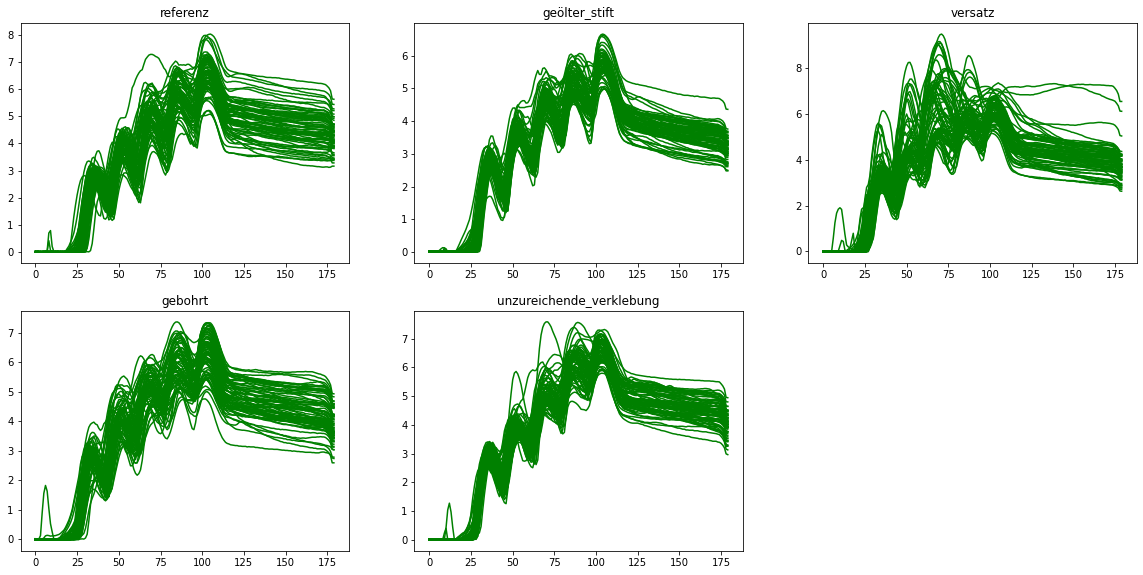

In [ ]:
plt.figure(figsize = (20,15))

plt.subplot(331)
plt.title("referenz")
plot_graphen(referenz)
plt.subplot(332)
plot_graphen(geölter_stift)
plt.title("geölter_stift")
plt.subplot(333)
plot_graphen(versatz)
plt.title("versatz")
plt.subplot(334)
plot_graphen(gebohrt)
plt.title("gebohrt")
plt.subplot(335)
plot_graphen(unzureichende_verklebung)
plt.title("unzureichende_verklebung")

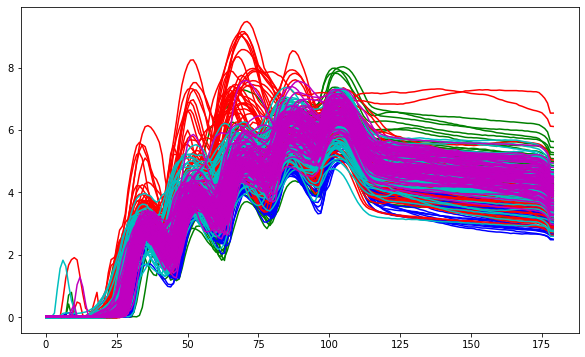

In [ ]:
plt.figure(figsize = (10,6))
plot_graphen(referenz, label = "Referenz")
plot_graphen(geölter_stift, color = "b", label="Geölter Stift")
plot_graphen(versatz, color = "r", label= "Versatz")
plot_graphen(gebohrt, color = "c", label = "Gebort")
plot_graphen(unzureichende_verklebung, color = "m", label = "Unzureichende verklebung")

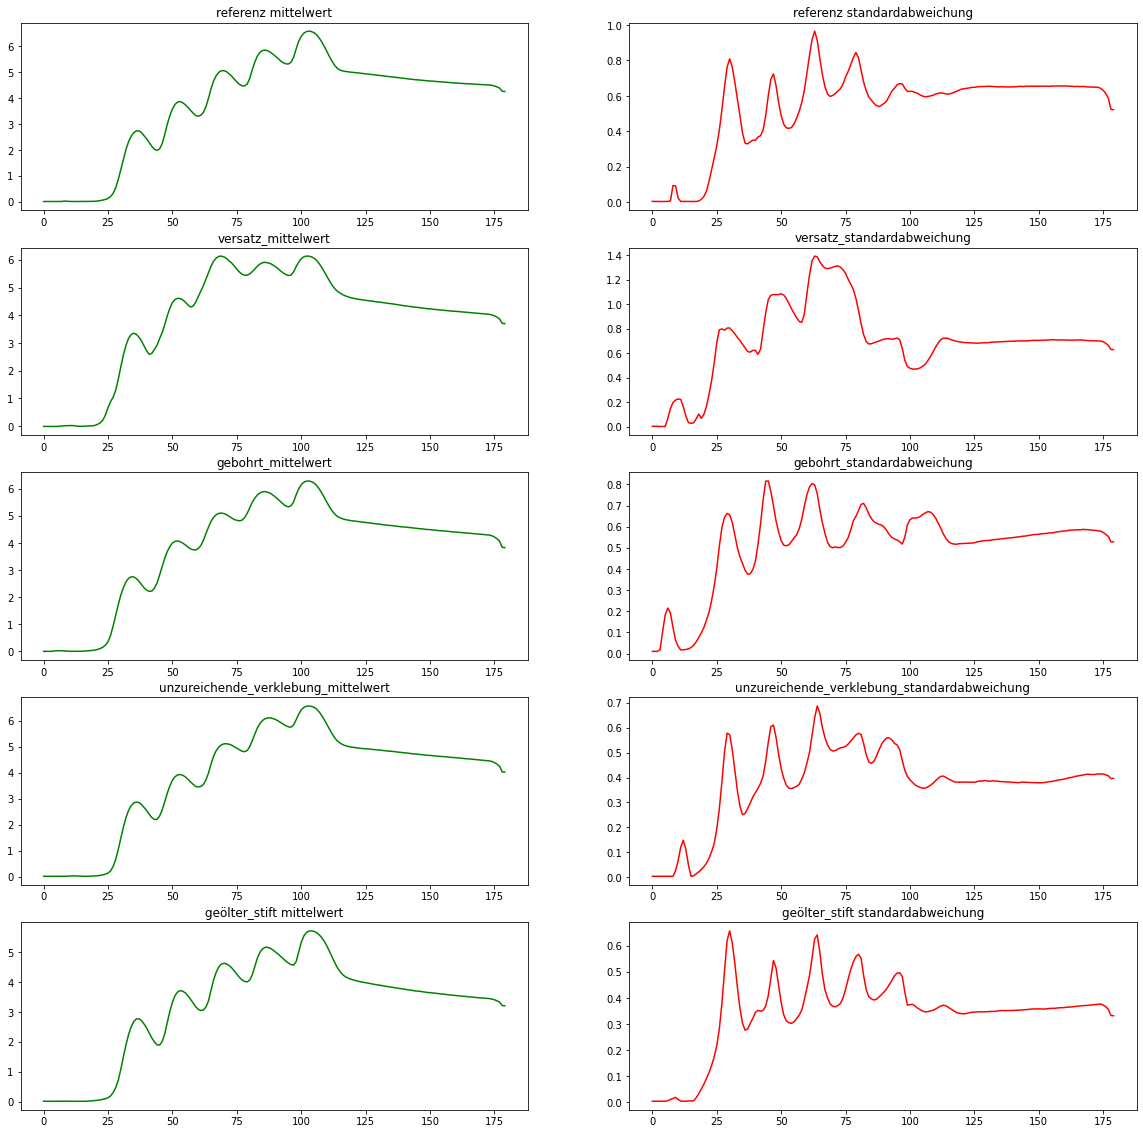

In [ ]:
# mittelwerte der Kategorien
referenz_mittelwert = referenz.mean()
geölter_stift_mittelwert = geölter_stift.mean()
versatz_mittelwert = versatz.mean()
gebohrt_mittelwert = gebohrt.mean()
unzureichende_verklebung_mittelwert= unzureichende_verklebung.mean()

# standardabweichung der kategorien
referenz_standardabweichung = referenz.std()
geölter_stift_standardabweichung = geölter_stift.std()
versatz_standardabweichung = versatz.std()
gebohrt_standardabweichung = gebohrt.std()
unzureichende_verklebung_standardabweichung= unzureichende_verklebung.std()

# BEACHTE DIE Y-ACHSEN DER STANDARDABWEICHUNGEN
plt.figure(figsize = (20,20))

ax1 = plt.subplot2grid((5,2), (0,0))
ax1.set_title("referenz mittelwert")
plot_graphen(referenz_mittelwert)

ax2 = plt.subplot2grid((5,2), (0,1))
ax2.set_title("referenz standardabweichung")
plot_graphen(referenz_standardabweichung,color = "r")

ax3 = plt.subplot2grid((5,2), (1,0),rowspan=1, colspan=1)
ax3.set_title("versatz_mittelwert")
plot_graphen(versatz_mittelwert)

ax4 = plt.subplot2grid((5,2), (1,1))
ax4.set_title("versatz_standardabweichung")
plot_graphen(versatz_standardabweichung,color = "r")

ax5 = plt.subplot2grid((5,2), (2,0))
ax5.set_title("gebohrt_mittelwert")
plot_graphen(gebohrt_mittelwert)

ax6 = plt.subplot2grid((5,2), (2,1))
ax6.set_title("gebohrt_standardabweichung")
plot_graphen(gebohrt_standardabweichung,color = "r")

ax7 = plt.subplot2grid((5,2), (3,0))
ax7.set_title("unzureichende_verklebung_mittelwert")
plot_graphen(unzureichende_verklebung_mittelwert)

ax8 = plt.subplot2grid((5,2), (3,1))
ax8.set_title("unzureichende_verklebung_standardabweichung")
plot_graphen(unzureichende_verklebung_standardabweichung,color = "r")

ax9 = plt.subplot2grid((5,2), (4,0))
ax9.set_title("geölter_stift mittelwert")
plot_graphen(geölter_stift_mittelwert)

ax10 = plt.subplot2grid((5,2), (4,1))
ax10.set_title("geölter_stift standardabweichung")
plot_graphen(geölter_stift_standardabweichung,color = "r")


In [ ]:
mean_der_standardabweichungen = zip([data.mean() for data in [referenz_standardabweichung,geölter_stift_standardabweichung,versatz_standardabweichung,gebohrt_standardabweichung,unzureichende_verklebung_standardabweichung]], ["referenz_standardabweichung","geölter_stift_standardabweichung","versatz_standardabweichung","gebohrt_standardabweichung","unzureichende_verklebung_standardabweichung"])
print(list(mean_der_standardabweichungen))

[(0.5387873940491458, 'referenz_standardabweichung'), (0.34083210594255753, 'geölter_stift_standardabweichung'), (0.6981063629162603, 'versatz_standardabweichung'), (0.5114328520512373, 'gebohrt_standardabweichung'), (0.37440410346349917, 'unzureichende_verklebung_standardabweichung')]


# Train/Test Split

## Split in test und main set (= validation + train set)
 <br>
 main set wird für cross_val_score/_predict verwendet

In [ ]:
aufteilungsgruppen = df["Kategorienummer"].copy()
aufteilungsgruppen

0       0
1       0
2       0
3       0
4       0
       ..
355    13
356    13
357    13
358    13
359    13
Name: Kategorienummer, Length: 360, dtype: int64

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit

aufteilung = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for main_id, test_id in aufteilung.split(df, aufteilungsgruppen):
    main_set = df.loc[main_id] # main set = train + valdiation set
    strat_test_set = df.loc[test_id]

In [ ]:
# Test Data
anzahl_kategorienummer = [strat_test_set.loc[strat_test_set["Kategorienummer"]==catnum] for catnum in range(13)]
elemente_je_kategorie_in_strat_test_set = [len(anzahl_kategorienummer[zahl].index) for zahl in range(13)]
print(elemente_je_kategorie_in_strat_test_set)


[14, 14, 3, 4, 4, 4, 4, 4, 4, 4, 3, 3, 4]


In [ ]:
strat_test_set.head()

,Kategorie,Unterkategorie,Kategorienummer,200,200.1,200.2,200.3,200.4,200.5,200.6,...,231.2,231.3,231.4,231.5,231.6,231.7,231.8,231.9,232,232.1
344,UnzureichendeVerklebung,UnzureichendeVerklebung 4,13,1.830000e-02,9.099990e-03,1.830000e-02,9.099990e-03,9.099990e-03,9.099990e-03,1.830000e-02,...,4.560596,4.560596,4.560596,4.551497,4.533197,4.496699,4.432896,4.332603,4.104499,4.0954
273,Gebohrt,Gebohrt 4,9,1.830000e-02,1.830000e-02,9.099990e-03,1.830000e-02,9.099990e-03,9.099990e-03,1.830000e-02,...,4.688304,4.679196,4.670003,4.660895,4.642704,4.606201,4.524098,4.414697,4.159306,4.1501
240,Gebohrt,Gebohrt 2,7,2.053510e-10,-9.200007e-03,2.053510e-10,2.053510e-10,2.053510e-10,2.053510e-10,-9.200007e-03,...,4.387204,4.368993,4.341608,4.332502,4.277800,4.204801,4.113607,3.994994,3.721397,3.7031
145,Versatz,Versatz 1,2,9.099991e-03,3.104890e-08,3.104890e-08,3.104890e-08,3.104890e-08,3.104890e-08,3.104890e-08,...,4.387199,4.368994,4.359900,4.350699,4.323399,4.286899,4.223098,4.150097,3.958500,3.9585
255,Gebohrt,Gebohrt 3,8,1.830000e-02,1.830000e-02,9.099959e-03,1.830000e-02,9.099959e-03,0.000000e+00,9.099959e-03,...,4.606201,4.597104,4.587996,4.578796,4.551495,4.496696,4.405501,4.305197,4.067997,4.0589


In [ ]:
df.shape , main_set.shape

((360, 325), (288, 325))

In [ ]:
aufteilungsgruppen = main_set["Kategorienummer"].copy()

In [ ]:
# aufteilung des train_val_set daten in test und validation daten
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_id, validation_id in split.split(main_set, aufteilungsgruppen): 
  strat_train_set = main_set.iloc[train_id]
  strat_validation_set = main_set.iloc[validation_id]

In [ ]:
# Validation Data
anzahl_kategorienummer = [strat_validation_set.loc[strat_validation_set["Kategorienummer"]==catnum] for catnum in range(13)]
elemente_je_kategorie_in_strat_train_set = [len(anzahl_kategorienummer[zahl].index) for zahl in range(13)]
print(elemente_je_kategorie_in_strat_train_set)

[11, 11, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]


In [ ]:
#Train Data
anzahl_kategorienummer = [strat_train_set.loc[strat_train_set["Kategorienummer"]==catnum] for catnum in range(13)]
elemente_je_kategorie_in_strat_train_set = [len(anzahl_kategorienummer[zahl].index) for zahl in range(13)]
print(elemente_je_kategorie_in_strat_train_set)

[47, 47, 12, 11, 11, 11, 11, 11, 11, 11, 12, 12, 11]


In [ ]:
strat_train_set.head()

,Kategorie,Unterkategorie,Kategorienummer,200,200.1,200.2,200.3,200.4,200.5,200.6,...,231.2,231.3,231.4,231.5,231.6,231.7,231.8,231.9,232,232.1
75,GeoelterStift,GeoelterStift,1,0.0182,1.820001e-02,1.820001e-02,0.0182,1.820001e-02,0.0182,0.0182,...,2.937000,2.927896,2.918801,2.909598,2.900504,2.873201,2.854904,2.836696,2.772799,2.7546
76,GeoelterStift,GeoelterStift,1,0.0182,1.819995e-02,1.819995e-02,0.0182,2.739999e-02,0.0182,0.0274,...,2.827601,2.827601,2.809302,2.809302,2.800198,2.772801,2.763703,2.727201,2.645100,2.6451
248,Gebohrt,Gebohrt 2,7,-0.0092,2.053510e-10,2.053510e-10,-0.0092,2.053510e-10,-0.0092,-0.0092,...,3.876403,3.858203,3.849102,3.840003,3.821697,3.803497,3.767005,3.693995,3.520700,3.5207
283,Gebohrt,Gebohrt 4,9,0.0183,9.099990e-03,1.830000e-02,0.0183,1.830000e-02,0.0183,0.0091,...,4.186605,4.177507,4.168394,4.140995,4.104497,4.049803,3.976794,3.876505,3.630196,3.6120
69,Referenz,Referenz,0,0.0182,1.819995e-02,1.819995e-02,0.0182,1.819995e-02,0.0182,0.0182,...,3.675798,3.666703,3.648499,3.648499,3.639302,3.621099,3.593698,3.566399,3.475198,3.4660


## Bestimmung von Target/Feature

In [ ]:
# train data
X_train = strat_train_set.iloc[:,145:]
y_train = strat_train_set["Kategorie"].copy() 

# validation data
X_val = strat_validation_set.iloc[:,145:]
y_val = strat_validation_set["Kategorie"].copy() 

# test data
X_test = strat_test_set.iloc[:,145:]
y_test = strat_test_set["Kategorie"].copy() 

In [ ]:
y_train

75               GeoelterStift
76               GeoelterStift
248                    Gebohrt
283                    Gebohrt
69                    Referenz
                ...           
227                    Gebohrt
50                    Referenz
144                    Versatz
4                     Referenz
352    UnzureichendeVerklebung
Name: Kategorie, Length: 230, dtype: object

In [ ]:
# Encoding von Target mit LabelEncoder()
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(y_train)

y_train = le.transform(y_train)
y_val = le.transform(y_val)
y_test = le.transform(y_test)
y_main = np.r_[y_train, y_val]

y_test, y_val, y_train, le.classes_

(array([3, 0, 0, 4, 0, 4, 0, 2, 4, 0, 2, 3, 4, 3, 0, 3, 2, 4, 1, 1, 1, 2,
        2, 0, 4, 3, 2, 1, 4, 3, 1, 1, 3, 2, 0, 3, 2, 2, 0, 1, 3, 2, 2, 4,
        1, 2, 4, 3, 1, 1, 1, 4, 4, 4, 2, 0, 0, 1, 1, 0, 3, 3, 4, 0, 0, 0,
        2, 4, 4, 0, 1, 3]),
 array([0, 4, 2, 4, 3, 0, 4, 1, 3, 0, 4, 2, 3, 1, 3, 1, 3, 2, 2, 3, 0, 4,
        2, 1, 4, 0, 1, 3, 3, 1, 0, 1, 4, 2, 0, 3, 2, 0, 0, 0, 4, 0, 1, 3,
        1, 4, 3, 4, 2, 3, 4, 1, 2, 0, 2, 2, 4, 1]),
 array([1, 1, 0, 0, 2, 3, 0, 1, 0, 2, 4, 3, 3, 3, 4, 3, 0, 2, 4, 4, 4, 4,
        1, 1, 1, 1, 2, 4, 1, 1, 0, 1, 0, 2, 2, 1, 3, 0, 2, 1, 3, 1, 2, 4,
        2, 2, 0, 0, 1, 3, 3, 0, 3, 4, 2, 3, 3, 4, 0, 3, 0, 2, 1, 3, 4, 0,
        2, 1, 1, 4, 4, 4, 1, 1, 3, 1, 0, 1, 1, 3, 1, 1, 4, 4, 0, 4, 1, 1,
        4, 4, 2, 1, 1, 2, 2, 3, 1, 2, 2, 2, 1, 3, 3, 2, 3, 4, 1, 4, 2, 3,
        0, 2, 0, 2, 3, 0, 4, 0, 3, 3, 4, 0, 1, 2, 1, 2, 2, 4, 0, 3, 4, 1,
        3, 2, 2, 0, 1, 3, 3, 4, 0, 3, 2, 3, 4, 3, 2, 4, 2, 2, 1, 2, 2, 3,
        0, 1, 4, 2, 4, 2, 0, 3, 

In [ ]:
klassen_namen = ['Gebohrt', 'GeoelterStift', 'Referenz', 'UnzureichendeVerklebung','Versatz']

In [ ]:
X_train, y_train, X_train.shape, X_test.shape, y_train.shape, y_main.shape

(        214.2     214.3     214.4     214.5     214.6     214.7     214.8  \
 75   0.018185  0.009100  0.018185  0.018185  0.018185  0.009100  0.018185   
 76   0.018177  0.018177  0.009100  0.018177  0.018177  0.009100  0.018177   
 248 -0.009218 -0.009218 -0.009218 -0.009218 -0.009218  0.000016 -0.009218   
 283  0.018319  0.009100  0.009100  0.009100  0.009100  0.018319  0.009100   
 69   0.018198  0.018198  0.009100  0.009100  0.018198  0.018198  0.018198   
 ..        ...       ...       ...       ...       ...       ...       ...   
 227 -0.009200 -0.009200 -0.009200 -0.009200 -0.009200 -0.009200 -0.000029   
 50   0.009100  0.009100  0.009100  0.009100  0.009100  0.018203  0.009100   
 144 -0.000003 -0.000003 -0.000003 -0.000003 -0.000003 -0.000003 -0.000003   
 4    0.009100  0.009100  0.009100  0.009100  0.009100  0.009100  0.009100   
 352  0.018299  0.018299  0.018299  0.018299  0.009100  0.018299  0.018299   
 
         214.9       215     215.1  ...     231.2     231.3   

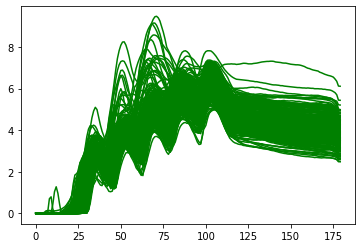

In [ ]:
plot_graphen(X_train)

# Feature Scaling (für weiteren Verlauf StandatdScaler)

StandardScaler ausgesucht, weil MinMax Scaler den verlauf der Graphen komisch macht



*   StandardScaler: Standardize features by removing the MEAN and scaling to unit variance
*   RobustSclaer:  removes the MEDIAN and scales the data according to the quantile range 
*   MinMaxScaler: scaling each feature to a given range






Hinweis: Scaler skalieren Spalten. <br>
Ich möchte die einzelnen Graphen skalieren. Bei den Rohdaten ist eine Zeile ein Graph. <br>
D.h. damit ich die Graphen skalieren kann muss ich die Zeilen Transponieren--> dann werden die Zeilen zu Spalten und der Scaler skaliert die Graphen.
<br>
Nach der Skalierung muss ich die skalierten daten zurücktransponieren. Denn bei den Targetdaten (y_data) sind ist es immer noch so das eine Zeile einer Prozesskurve entspricht.
<br>
<br>
Bestätigung das Transponieren richtig ist. Annahme: Ich habe nur eine Prozesskurve. 
  - Kurve als Zeile dargestellt: StandardScaler nimmt von jeder Spalte der Zeile den mean & std --> von jedem Punkt wird mean & std genommen. Sinnlos.
  - Kurve als Spalte dargestellt: StandardScaler nimmt von jeder Spalte also jeder Kurve den mean & std --> logisch 


## Scaling of traindaten

In [ ]:
x_achse = np.arange(180)
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

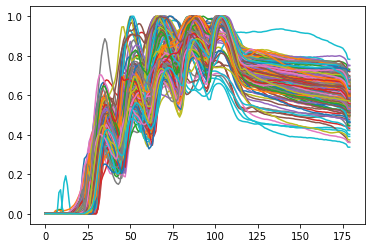

In [ ]:
#MinMaxScaler
numerische_spalten = strat_train_set.iloc[:,145:].T # Transforieren!!
min_max_scaler = MinMaxScaler()
min_max_skalierte_train_data = min_max_scaler.fit_transform(numerische_spalten) # returns: transformed data
plt.plot(x_achse,min_max_skalierte_train_data)
plt.show() # die ganzen benachrichtigungen wurden damit disabled

In [ ]:
min_max_skalierte_train_data.shape

(180, 230)

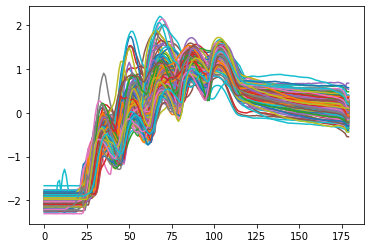

In [ ]:
# StandardScaler
# Transformation like scaling only on train data!!!!!!!!
# ich möchte die einzelnen Graphen normalisieren. Bei den Rohdaten ist ein Graph eine Zeile. StandardScaler normalisiert Spalten --> Transponieren
numerische_spalten = strat_train_set.iloc[:,145:].T # Transponieren!! denn --> StandardScaler() will normalize the features i.e. each column of X, INDIVIDUALLY, so that each column/feature/variable will have μ = 0 and σ = 1
standartisierer = StandardScaler()
standard_scalierte_train_data = standartisierer.fit_transform(numerische_spalten) # returns: transformed data
plt.plot(x_achse, standard_scalierte_train_data)
plt.show()

In der Masterarbeit wurde RobustScaler verwendet

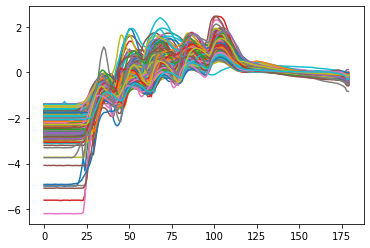

In [ ]:
# RobustSclaer
numerische_spalten = strat_train_set.iloc[:,145:].T # Transponieren!! denn --> RobustScaler() will normalize the features i.e. each column of X, INDIVIDUALLY, so that each column/feature/variable will have μ = 0 and σ = 1
robust_scaler = RobustScaler()
robust_scalierte_train_data = robust_scaler.fit_transform(numerische_spalten) # returns: transformed data
plt.plot(x_achse, robust_scalierte_train_data)
plt.show()

In [ ]:
# Für weiteren Verlauf müssen die Daten zurücktransponiert werden
robust_scalierte_train_data = robust_scalierte_train_data.T
standard_scalierte_train_data = standard_scalierte_train_data.T
min_max_skalierte_train_data = min_max_skalierte_train_data.T

## Scaling of validation/test data

In [ ]:
# scaling of the validation data --> NUR TRANSFORM nicht fit!!!!!!!!!!
numerische_spalten = strat_validation_set.iloc[:,145:].T # transponieren wie train data auch
append_an_validation_data = np.zeros(shape=(180,172)) # spalten hinzufügen damit val und train set selbe anzahl an columns haben
array = [numerische_spalten,append_an_validation_data]
numerische_spalten= np.hstack(array)

min_max_skalierte_val_data = min_max_scaler.transform(numerische_spalten) # returns: Transformed array.
standard_scalierte_val_data = standartisierer.transform(numerische_spalten)
robust_scalierte_val_data = robust_scaler.transform(numerische_spalten)

# scaling of the test data --> NUR TRANSFORM nicht fit!!!!
numerische_spalten = strat_test_set.iloc[:,145:].T
append_an_test_data = np.zeros(shape=(180,158))
array = [numerische_spalten,append_an_test_data]
numerische_spalten= np.hstack(array)

min_max_skalierte_test_data = min_max_scaler.transform(numerische_spalten) 
standard_scalierte_test_data = standartisierer.transform(numerische_spalten)
robust_scalierte_test_data = robust_scaler.transform(numerische_spalten)




In [ ]:
# die zusätzlich hinzugefügten spalten mit den zeros löschen
min_max_skalierte_val_data = np.delete(min_max_skalierte_val_data, slice(58,230), axis = 1)
standard_scalierte_val_data = np.delete(standard_scalierte_val_data, slice(58,230), axis = 1)
robust_scalierte_val_data = np.delete(robust_scalierte_val_data, slice(58,230), axis = 1)

min_max_skalierte_test_data = np.delete(min_max_skalierte_test_data , slice(72,230), axis = 1)
standard_scalierte_test_data = np.delete(standard_scalierte_test_data, slice(72,230), axis = 1)
robust_scalierte_test_data = np.delete(robust_scalierte_test_data, slice(72,230), axis = 1)

min_max_skalierte_val_data.shape # shape passt


(180, 58)

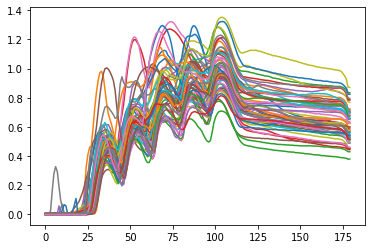

In [ ]:
plt.plot(x_achse,min_max_skalierte_val_data)
plt.show()

In [ ]:
# Alle sklaierten Daten zurück transponieren, sodas eine zeile einer Prozesskurve entspricht
min_max_skalierte_val_data = min_max_skalierte_val_data.T
standard_scalierte_val_data = standard_scalierte_val_data.T
robust_scalierte_val_data =robust_scalierte_val_data.T

min_max_skalierte_test_data = min_max_skalierte_test_data.T
standard_scalierte_test_data = min_max_skalierte_test_data.T
robust_scalierte_test_data = min_max_skalierte_test_data.T

min_max_skalierte_val_data.shape # shape passt

(58, 180)

Strategie im weiteren Verlauf
  - Alle model mit nur min_max_scaler trainieren; valdiideren, teste
  - wenn bestes model feststeht --> schauen welche skalierung am besten ist

Das heißt im weiteren Verlauf ist X_train/_val/_test min_max_scaliert (y_train/_val/_test wurde oben festgelegt)

In [ ]:
#y_train/_test/_val oben festgeleget

X_train, X_val, X_test = min_max_skalierte_train_data, min_max_skalierte_val_data, min_max_skalierte_test_data
X_main = np.vstack((X_train, X_val))

In [ ]:
X_val.shape, X_train.shape, X_test.shape, X_main.shape

((58, 180), (230, 180), (72, 180), (288, 180))

# Select and Train a model

Metrics = accuracy, f1, precision, recall, auc




## Model KNn

### Train KNN (mit min_max, standard_sclaer, robust_scaler gesteste --> nach knn nur X_train/_val/_test also min_max-sclaer verwenden)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# erstelle model instanz
knn_min_max =  KNeighborsClassifier()
knn_standard_scaler =  KNeighborsClassifier()
knn_robust_scaler = KNeighborsClassifier()

knn_min_max.fit(min_max_skalierte_train_data, y_train)
knn_standard_scaler.fit(standard_scalierte_train_data, y_train)
knn_robust_scaler.fit(robust_scalierte_train_data,y_train)

KNeighborsClassifier()

### Valdiate Knn

In [ ]:
# cross validatino with AUC
from sklearn.model_selection import cross_val_score

min_max_scores = cross_val_score(knn_min_max, min_max_skalierte_val_data, y_val, scoring = "roc_auc_ovo", cv = 10)
standard_scaler_scores = cross_val_score(knn_standard_scaler, standard_scalierte_val_data , y_val, scoring = "roc_auc_ovo", cv = 10)
robust_scaler_scores = cross_val_score(knn_robust_scaler, robust_scalierte_val_data, y_val, scoring = "roc_auc_ovo", cv = 10)

min_max_scores.mean(), standard_scaler_scores.mean(), robust_scaler_scores.mean() # Area Under the Curve score (ich habe den mean von den 10 werten des cross_val_score)

(0.7737499999999999, 0.73875, 0.7024999999999999)

In [ ]:
# confusion metrics
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

pred_min_max = cross_val_predict(knn_min_max,min_max_skalierte_train_data, y_train, cv = 5)
pred_standard = cross_val_predict(knn_standard_scaler,standard_scalierte_train_data, y_train, cv = 5)
pred_robust = cross_val_predict(knn_robust_scaler,robust_scalierte_train_data,y_train, cv=5)

min_max_conf_matrix = confusion_matrix(y_train,pred_min_max)
standard_conf_matrix = confusion_matrix(y_train,pred_standard)
robust_conf_matrix = confusion_matrix(y_train,pred_robust)

print(min_max_conf_matrix)
print(standard_conf_matrix)
print(robust_conf_matrix)

[[25  2  6 10  1]
 [ 0 41  3  3  0]
 [ 6  8 22 11  0]
 [ 5  4 12 25  1]
 [ 9  2  5  3 26]]
[[27  1  5 10  1]
 [ 0 41  3  3  0]
 [ 4  9 23 11  0]
 [ 3  5 12 26  1]
 [ 5  3  6  4 27]]
[[26  2  6  6  4]
 [ 3 36  2  6  0]
 [ 5  9 16 16  1]
 [ 8  6 17 16  0]
 [ 5  4  3  4 29]]


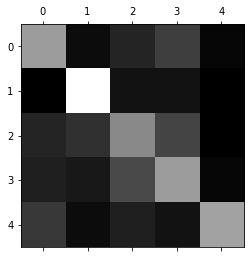

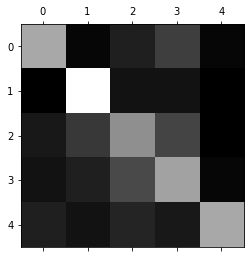

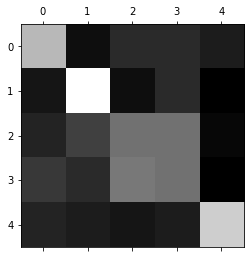

In [ ]:
plt.matshow(min_max_conf_matrix, cmap = plt.cm.gray)
plt.matshow(standard_conf_matrix, cmap = plt.cm.gray)
plt.matshow(robust_conf_matrix, cmap = plt.cm.gray)

Erkenntnis:
- (1,1) sehr hell --> kann gut vorher gesagt werden
- (2,3) bzw (3,2) hell --> klassen werden oft vertauscht

In [ ]:
#classification report

from sklearn.metrics import classification_report

min_max_cr = classification_report(y_train,pred_min_max)
standard_cr = classification_report(y_train,pred_standard)
robust_cr = classification_report(y_train,pred_robust)

print(min_max_cr)
print(standard_cr)
print(robust_cr)

              precision    recall  f1-score   support

           0       0.56      0.57      0.56        44
           1       0.72      0.87      0.79        47
           2       0.46      0.47      0.46        47
           3       0.48      0.53      0.51        47
           4       0.93      0.58      0.71        45

    accuracy                           0.60       230
   macro avg       0.63      0.60      0.61       230
weighted avg       0.63      0.60      0.61       230

              precision    recall  f1-score   support

           0       0.69      0.61      0.65        44
           1       0.69      0.87      0.77        47
           2       0.47      0.49      0.48        47
           3       0.48      0.55      0.51        47
           4       0.93      0.60      0.73        45

    accuracy                           0.63       230
   macro avg       0.65      0.63      0.63       230
weighted avg       0.65      0.63      0.63       230

              precisio

### Hyperparameter Tuning

#### learning Kurve n_neighbors

In [ ]:
from sklearn.metrics import accuracy_score, f1_score

accuracies = []
f1 = []

test_bereich = np.arange(1, 100) # bis 14 macht sinn da es ingesamt 14 Unterkategorien von den 5 Kategorien (=target)
for i in test_bereich:
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train, y_train)
  prediction = knn.predict(X_val)
  score_ac = accuracy_score(y_val, prediction)
  score_f1 = f1_score(y_val, prediction, average = "macro" )
  accuracies.append(score_ac)
  f1.append(score_f1)

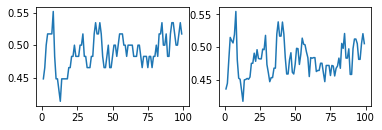

In [ ]:
plt.subplot(221)
plt.plot(test_bereich,accuracies)

plt.subplot(222)
plt.plot(test_bereich,f1)


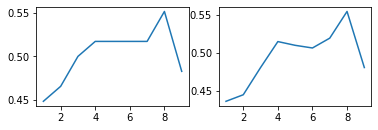

In [ ]:
accuracies = []
f1 = []
test_bereich = np.arange(1, 10)
for i in test_bereich:
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train, y_train)
  prediction = knn.predict(X_val)
  score_ac = accuracy_score(y_val, prediction)
  score_f1 = f1_score(y_val, prediction, average = "macro" )
  accuracies.append(score_ac)
  f1.append(score_f1)

plt.subplot(221)
plt.plot(test_bereich,accuracies)

plt.subplot(222)
plt.plot(test_bereich,f1)

Fazit: n_neighbors = 8 optimal (Ich habe 14 Unterkategorien deshalb sollte der geteeste bereich zwischen 1 und 14 liegen glaube ich)

#### GridSearch 

In [ ]:
from sklearn.model_selection import GridSearchCV

hyperparameter = [
    {"weights":  ["uniform", "distance"],
     "p": [1,2] 
     }
]

knn = KNeighborsClassifier(n_neighbors=8)
grid_search = GridSearchCV(estimator = knn, param_grid =hyperparameter)

grid_search.fit(X_train, y_train)
grid_search.best_estimator_

KNeighborsClassifier(n_neighbors=8, weights='distance')

Wahrscheinlich KNeighborsClassifier(n_neighbors=8, weights='distance') beste --> FALSCH

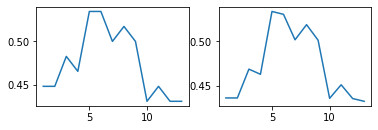

In [ ]:
# nochmal testen ob wirklich bestes ist

accuracies = []
f1 = []

test_bereich = np.arange(1, 14)
for i in test_bereich:
  knn = KNeighborsClassifier(n_neighbors=i, weights='distance')
  knn.fit(X_train, y_train)
  prediction = knn.predict(X_val)
  score_ac = accuracy_score(y_val, prediction)
  score_f1 = f1_score(y_val, prediction, average = "macro" )
  accuracies.append(score_ac)
  f1.append(score_f1)

plt.subplot(221)
plt.plot(test_bereich,accuracies)

plt.subplot(222)
plt.plot(test_bereich,f1)

In [ ]:
hyperparameter = [
    { "n_neighbors": range(1,15),
      "weights":  ["uniform", "distance"],
     "p": [1,2] 
     }
]

knn = KNeighborsClassifier()
grid_search = GridSearchCV(estimator = knn, param_grid =hyperparameter, scoring = "accuracy", cv = 10, return_train_score= True )

grid_search.fit(X_train, y_train)
grid_search.best_estimator_, grid_search.cv_results_

(KNeighborsClassifier(n_neighbors=4, weights='distance'),
 {'mean_fit_time': array([0.00145721, 0.00119989, 0.00139592, 0.00105915, 0.00167375,
         0.00124466, 0.00322726, 0.00127056, 0.00121512, 0.00106401,
         0.00109046, 0.00095782, 0.00092471, 0.00076663, 0.00101151,
         0.00094707, 0.00095713, 0.00076168, 0.0010632 , 0.00093195,
         0.00100663, 0.00077755, 0.00101993, 0.0009619 , 0.00098374,
         0.00072672, 0.00103707, 0.00091777, 0.00099435, 0.00075071,
         0.00099514, 0.00095775, 0.00092034, 0.000735  , 0.00100212,
         0.00098212, 0.0009429 , 0.00077772, 0.00106561, 0.00096154,
         0.00091357, 0.00075517, 0.00102673, 0.00150619, 0.00097945,
         0.0007597 , 0.00103624, 0.00100567, 0.00097027, 0.00076933,
         0.00101645, 0.00177631, 0.0009475 , 0.0007324 , 0.00102649,
         0.00095985]),
  'std_fit_time': array([4.72883066e-04, 6.31764293e-05, 4.82368072e-04, 5.66971412e-05,
         1.35578960e-03, 1.14524495e-04, 3.85289605e-0

Fazit: KNeighborsClassifier(n_neighbors=4, weights='distance') beste

### Train/Valdiate endgültiges KNN model

In [ ]:
knn_min_max =  KNeighborsClassifier(n_neighbors=4, weights='distance')
knn_standard_scaler =  KNeighborsClassifier(n_neighbors=4, weights='distance')
knn_robust_scaler = KNeighborsClassifier(n_neighbors=4, weights='distance')

knn_min_max.fit(min_max_skalierte_train_data, y_train)
knn_standard_scaler.fit(standard_scalierte_train_data, y_train)
knn_robust_scaler.fit(robust_scalierte_train_data,y_train)

# cross validatino with AUC
from sklearn.model_selection import cross_val_score

min_max_scores = cross_val_score(knn_min_max, min_max_skalierte_val_data, y_val, scoring = "roc_auc_ovo", cv = 10)
standard_scaler_scores = cross_val_score(knn_standard_scaler, standard_scalierte_val_data , y_val, scoring = "roc_auc_ovo", cv = 10)
robust_scaler_scores = cross_val_score(knn_robust_scaler, robust_scalierte_val_data, y_val, scoring = "roc_auc_ovo", cv = 10)

min_max_scores.mean(), standard_scaler_scores.mean(), robust_scaler_scores.mean() # Area Under the Curve score (ich habe den mean von den 10 werten des cross_val_score)

(0.8175000000000001, 0.6950000000000001, 0.72)

In [ ]:
# confusion metrics
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

pred_min_max = cross_val_predict(knn_min_max,min_max_skalierte_train_data, y_train, cv = 5)
pred_standard = cross_val_predict(knn_standard_scaler,standard_scalierte_train_data, y_train, cv = 5)
pred_robust = cross_val_predict(knn_robust_scaler,robust_scalierte_train_data,y_train, cv=5)

min_max_conf_matrix = confusion_matrix(y_train,pred_min_max)
standard_conf_matrix = confusion_matrix(y_train,pred_standard)
robust_conf_matrix = confusion_matrix(y_train,pred_robust)

print(min_max_conf_matrix)
print(standard_conf_matrix)
print(robust_conf_matrix)

[[25  2  7  8  2]
 [ 0 38  4  5  0]
 [ 5  7 23 12  0]
 [ 4  1  8 32  2]
 [ 5  2  6  2 30]]
[[23  1  5 13  2]
 [ 0 39  4  4  0]
 [ 5  8 21 13  0]
 [ 1  3 11 31  1]
 [ 4  2  4  2 33]]
[[22  1  8  8  5]
 [ 2 37  4  4  0]
 [ 5  8 16 17  1]
 [ 3  5 14 24  1]
 [ 2  4  4  4 31]]


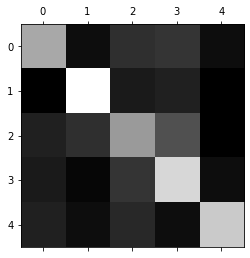

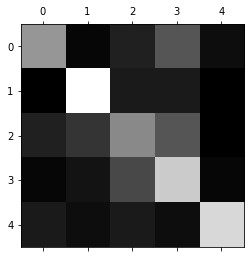

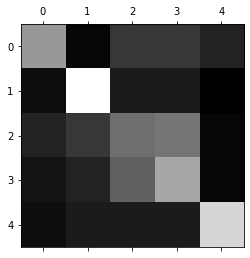

In [ ]:
plt.matshow(min_max_conf_matrix, cmap = plt.cm.gray)
plt.matshow(standard_conf_matrix, cmap = plt.cm.gray)
plt.matshow(robust_conf_matrix, cmap = plt.cm.gray)

In [ ]:
min_max_cr = classification_report(y_train,pred_min_max)
standard_cr = classification_report(y_train,pred_standard)
robust_cr = classification_report(y_train,pred_robust)

print(min_max_cr)
print(standard_cr)
print(robust_cr)

              precision    recall  f1-score   support

           0       0.64      0.57      0.60        44
           1       0.76      0.81      0.78        47
           2       0.48      0.49      0.48        47
           3       0.54      0.68      0.60        47
           4       0.88      0.67      0.76        45

    accuracy                           0.64       230
   macro avg       0.66      0.64      0.65       230
weighted avg       0.66      0.64      0.65       230

              precision    recall  f1-score   support

           0       0.70      0.52      0.60        44
           1       0.74      0.83      0.78        47
           2       0.47      0.45      0.46        47
           3       0.49      0.66      0.56        47
           4       0.92      0.73      0.81        45

    accuracy                           0.64       230
   macro avg       0.66      0.64      0.64       230
weighted avg       0.66      0.64      0.64       230

              precisio

Endgültiges Fazti KNN: knn_min_max =  KNeighborsClassifier(n_neighbors=4, weights='distance') mit Min_Max skalierte daten ist das beste

(None, 'UnzureichendeVerklebung', 'Gebohrt')

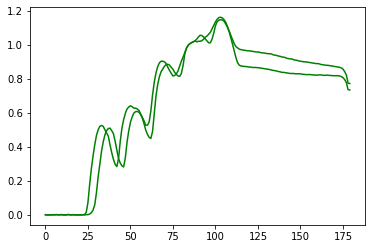

In [ ]:
plot_graphen(X_test[:2]), klassen_namen[y_test[0]], klassen_namen[y_test[1]]

In [ ]:
knn_min_max.predict(X_test[:2]) # Output [0,0] --> klassen_namen[0] = Gebohrt D.h. 2 mal gebohrt predicted

array([0, 0])

## Softmax Regression

### Hyperparameter Tuning Softmax Regeression

#### Learning Curve of C

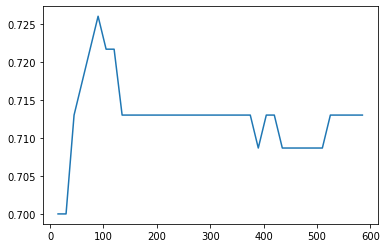

In [ ]:
# learning Curve with C und solver  = lbfgs

cross_val_mean = []

test_bereich = range(15, 600, 15)
for i in test_bereich:
  learning_curve_model = LogisticRegression(multi_class="multinomial", C = i, max_iter = 5000)
  learning_curve_model.fit(X_train, y_train)
  scores = cross_val_score(learning_curve_model, X_main, y_Main, scoring = "accuracy", cv = 5)
  score = scores.mean()
  cross_val_mean.append(score)


plt.plot(test_bereich,cross_val_mean)

([<matplotlib.lines.Line2D at 0x7f0d41b53b10>], 0.7347826086956522, 4)

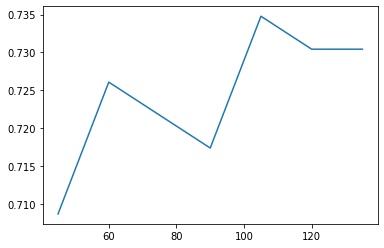

In [ ]:
cross_val_mean = []

test_bereich = range(45, 150, 15)
for i in test_bereich:
  learning_curve_model = LogisticRegression(multi_class="multinomial", C = i, max_iter = 5000)
  learning_curve_model.fit(X_train, y_train)
  scores = cross_val_score(learning_curve_model, X_main, y_main, scoring = "accuracy", cv = 10)
  score = scores.mean()
  cross_val_mean.append(score)


plt.plot(test_bereich,cross_val_mean), max(cross_val_mean), np.argmax(cross_val_mean)

In [ ]:
a = range(45,150,15)
a[3] # maximum bei 90 --> C=90

90

#### Grid Search

In [ ]:
from sklearn.linear_model import LogisticRegression

# erstelle model instanz
grid_model = LogisticRegression(multi_class="multinomial",  max_iter = 5000)

# gridsearch
hyperparameter = [
    {"solver":  ["newton-cg", "lbfgs", "sag", "saga"],
     "C": [85, 90, 95, 100, 105, 110] 
     }
]

grid_search = GridSearchCV(estimator = grid_model, param_grid =hyperparameter, scoring = "accuracy", cv = 10, return_train_score= True )

grid_search.fit(X_train, y_train)
grid_search.best_estimator_, grid_search.cv_results_

(LogisticRegression(C=105, max_iter=5000, multi_class='multinomial'),
 {'mean_fit_time': array([0.38520508, 1.11188848, 1.81826663, 3.31205118, 0.13739407,
         1.02879646, 1.97337093, 3.55096109, 0.14509346, 1.16683524,
         2.11885314, 3.79293876, 0.15004637, 1.14859447, 2.26896758,
         3.96711502]),
  'std_fit_time': array([0.14284308, 0.27030742, 0.06130103, 0.06333329, 0.01003269,
         0.02810681, 0.04272691, 0.06602993, 0.0084549 , 0.08573767,
         0.04232541, 0.13576786, 0.01469915, 0.06446667, 0.04015718,
         0.07798706]),
  'mean_score_time': array([0.00068381, 0.0004854 , 0.00055008, 0.00057595, 0.00047023,
         0.00046351, 0.00056796, 0.00058279, 0.00044823, 0.00048001,
         0.00055544, 0.00060694, 0.00049541, 0.00049822, 0.00053513,
         0.00057549]),
  'std_score_time': array([5.75494695e-05, 3.52895661e-05, 2.67168843e-05, 1.04964144e-04,
         3.03328125e-05, 1.21361614e-05, 6.66590207e-05, 4.87203218e-05,
         1.33117870e-05,

### Softmax Validation

In [ ]:
# cross validatino with AUC
from sklearn.model_selection import cross_val_score

#model = grid_search.best_estimator_
model = LogisticRegression(C=105, max_iter=5000, multi_class='multinomial')

scores = cross_val_score(model, X_main, y_main, scoring = "roc_auc_ovr", cv = 10)

scores.mean()

0.925905138339921

[[36  0  6  8  6]
 [ 1 52  4  1  0]
 [ 6  3 41  6  2]
 [ 9  3 10 34  3]
 [ 7  1  1  4 44]]


(None, <matplotlib.image.AxesImage at 0x7f0d3ce848d0>)

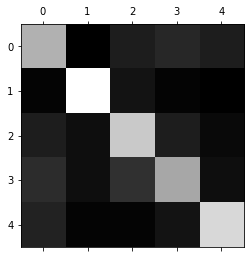

In [ ]:
# confusion metrics
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

predictions= cross_val_predict(model,X_main, y_main, cv = 10)

conf_matrix = confusion_matrix(y_main,predictions)

print(conf_matrix), plt.matshow(conf_matrix, cmap = plt.cm.gray)

In [ ]:
#classification report

from sklearn.metrics import classification_report

report = classification_report(y_main,predictions)

print(report)


              precision    recall  f1-score   support

           0       0.61      0.64      0.63        56
           1       0.88      0.90      0.89        58
           2       0.66      0.71      0.68        58
           3       0.64      0.58      0.61        59
           4       0.80      0.77      0.79        57

    accuracy                           0.72       288
   macro avg       0.72      0.72      0.72       288
weighted avg       0.72      0.72      0.72       288



## Random Forest

### Hyperparameter Tuning Random Forest (NICHT LAUFEN LASSEN)

In [ ]:
learning curves nicht nochmal laufen lassen!!!

SyntaxError: ignored

([<matplotlib.axis.XTick at 0x7f4ff2045e50>,
 <a list of 146 Text major ticklabel objects>)

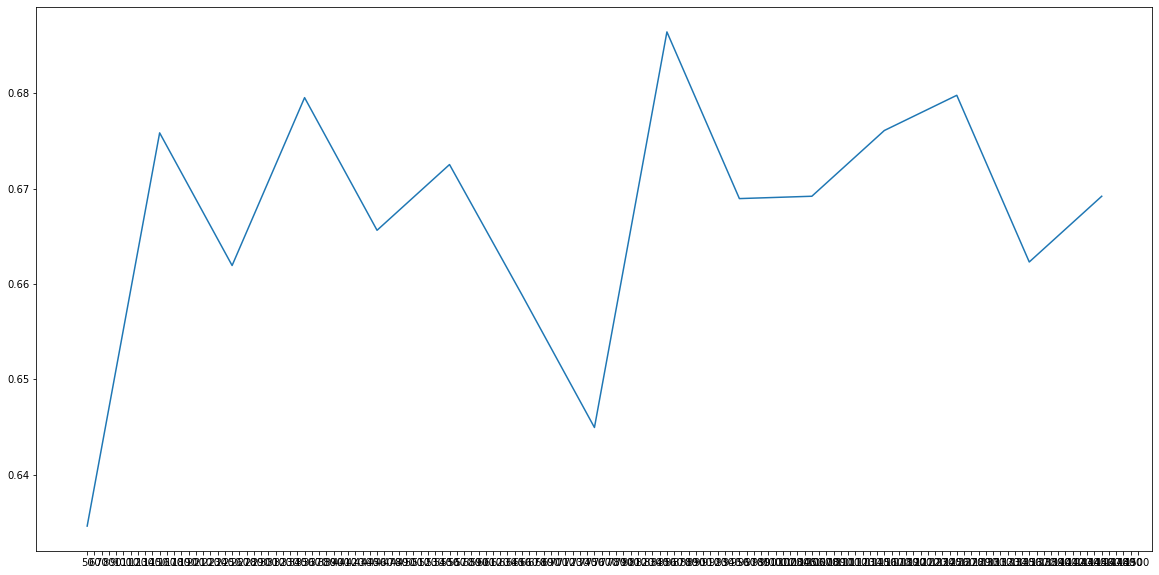

In [ ]:
# learning curve für bäume im Random Forest
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

cross_val_mean = []

test_bereich = range(50,1500, 100)
for i in test_bereich:
  learning_curve_model = RandomForestClassifier(n_estimators=i)
  learning_curve_model.fit(X_train, y_train)
  scores = cross_val_score(learning_curve_model, X_main, y_main, scoring = "accuracy", cv = 10)
  score = scores.mean()
  cross_val_mean.append(score)

plt.figure(figsize =(20,10))
plt.plot(test_bereich, cross_val_mean)
plt.xticks(np.arange(50, 1501, 150))

In [ ]:
max( cross_val_mean), np.argmax( cross_val_mean) , test_bereich[np.argmax( cross_val_mean)] # n_estimators = 850

(0.6864532019704433, 8, 850)

([<matplotlib.axis.XTick at 0x7f4ff225e7d0>,
 <a list of 20 Text major ticklabel objects>)

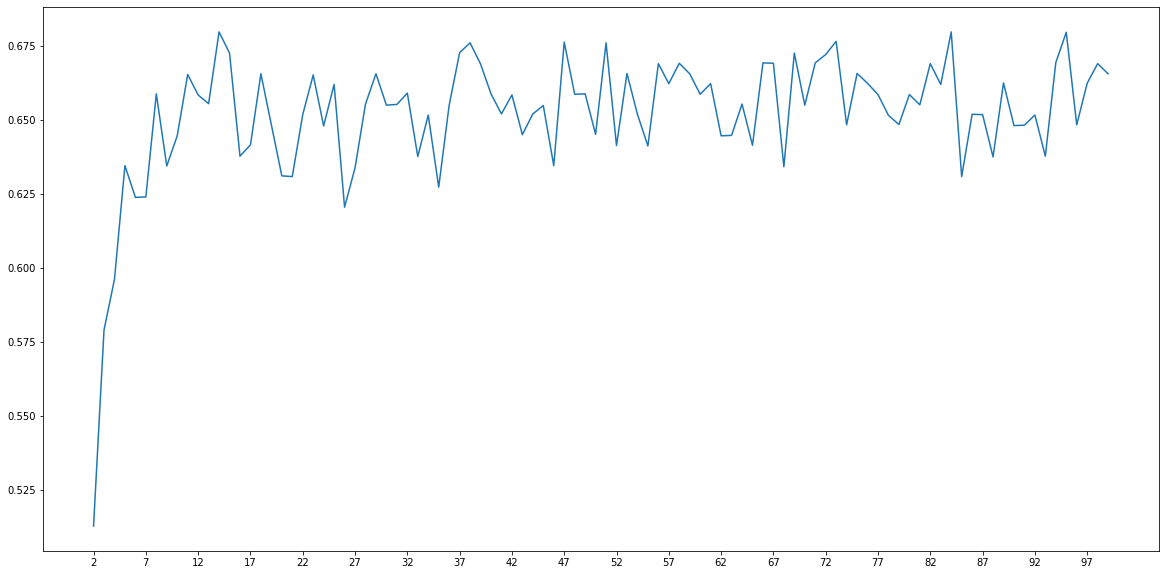

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

cross_val_mean = []

test_bereich = range(2, 100)
for i in test_bereich:
  learning_curve_model = RandomForestClassifier(max_depth = i)
  learning_curve_model.fit(X_train, y_train)
  scores = cross_val_score(learning_curve_model, X_main, y_main, scoring = "accuracy", cv = 10)
  score = scores.mean()
  cross_val_mean.append(score)

plt.figure(figsize =(20,10))
plt.plot(test_bereich, cross_val_mean)
plt.xticks(np.arange(2, 100, 5))

In [ ]:
max( cross_val_mean), np.argmax( cross_val_mean) , test_bereich[np.argmax( cross_val_mean)] # max_depth = 14

(0.6798029556650247, 12, 14)

(0.6794334975369459, 5, 7)

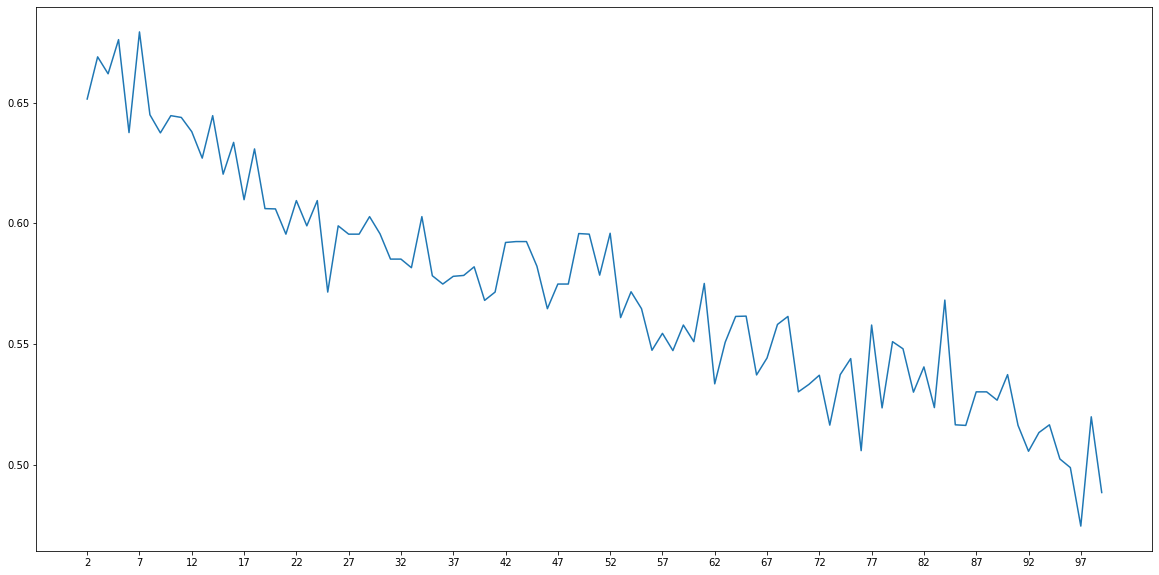

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier


cross_val_mean = []

test_bereich = range(2, 100)
for i in test_bereich:
  learning_curve_model = RandomForestClassifier(min_samples_split = i)
  learning_curve_model.fit(X_train, y_train)
  scores = cross_val_score(learning_curve_model, X_main, y_main, scoring = "accuracy", cv = 10)
  score = scores.mean()
  cross_val_mean.append(score)

plt.figure(figsize =(20,10))
plt.plot(test_bereich, cross_val_mean)
plt.xticks(np.arange(2, 100, 5))
max( cross_val_mean), np.argmax( cross_val_mean) , test_bereich[np.argmax( cross_val_mean)] # min_samples_split =7

(0.6556650246305419, 0, 1)

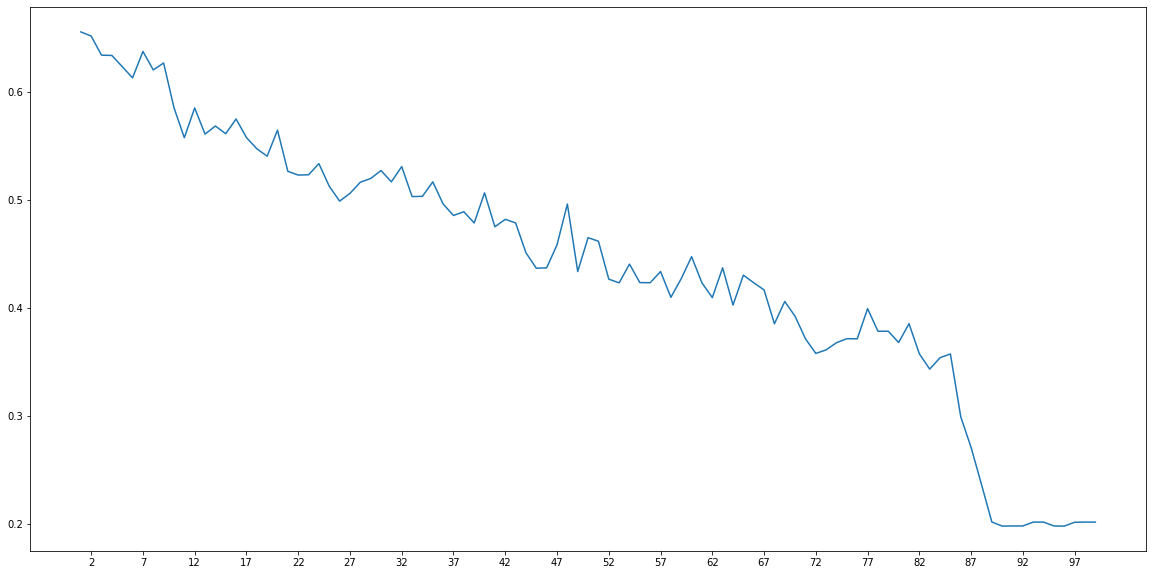

In [ ]:
cross_val_mean = []

test_bereich = range(1, 100)
for i in test_bereich:
  learning_curve_model = RandomForestClassifier(min_samples_leaf = i)
  learning_curve_model.fit(X_train, y_train)
  scores = cross_val_score(learning_curve_model, X_main, y_main, scoring = "accuracy", cv = 10)
  score = scores.mean()
  cross_val_mean.append(score)

plt.figure(figsize =(20,10))
plt.plot(test_bereich, cross_val_mean)
plt.xticks(np.arange(1, 100, 5))
max( cross_val_mean), np.argmax( cross_val_mean) , test_bereich[np.argmax( cross_val_mean)]

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
grid_model = RandomForestClassifier()

hyperparameter = [
    {"n_estimators": np.arange(100,10000,50),
     "max_depth": np.arange(2,100),
     "min_samples_split": np.arange(2,200),
     "max_features": ["sqrt", "log2", "auto"], # None nochaml testen
     }
]

grid_search = RandomizedSearchCV(estimator = grid_model, param_distributions =hyperparameter, n_iter = 500, scoring = "accuracy", cv = 5, return_train_score= True )

grid_search.fit(X_train, y_train)

NameError: ignored

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
grid_model = RandomForestClassifier()

hyperparameter = [
    {"n_estimators": np.arange(100,3000,50),
     "max_depth": np.arange(2,50),
     "min_samples_split": np.arange(2,100),
     "bootstrap": ["True", "False"], # wenn bootstrao ist true --> max_samples und oob_score testen
     "max_features": ["sqrt", "log2", "auto"], # None nochaml testen
     }
]

grid_search = RandomizedSearchCV(estimator = grid_model, param_distributions =hyperparameter, n_iter = 200, scoring = "accuracy", cv = 5, return_train_score= True )

grid_search.fit(X_train, y_train)
grid_search.best_estimator_, grid_search.cv_results_

(RandomForestClassifier(bootstrap='True', max_depth=16, max_features='log2',
                        n_estimators=1150),
 {'mean_fit_time': array([4.1025743 , 2.03697495, 2.46795893, 3.96010861, 1.15319805,
         5.19059839, 5.12401509, 3.49709578, 2.43538857, 1.23879261,
         0.68020773, 1.09192152, 2.72928576, 4.50479488, 0.93510766,
         1.06633458, 0.41589355, 2.46253161, 1.77053218, 1.63229532,
         1.67590957, 0.16268749, 2.87004476, 4.42305899, 1.90806403,
         3.44370728, 4.02222834, 2.03642087, 1.02406216, 0.15355754,
         4.89648905, 3.47815995, 2.01384077, 1.97215986, 2.40313797,
         2.22294722, 4.07996821, 1.70765443, 0.81752238, 2.29249907,
         0.14607005, 2.86292953, 0.6698308 , 2.12993026, 2.92945104,
         1.91417708, 1.21499805, 2.54667435, 2.56279597, 2.18536401,
         2.45734272, 3.3384604 , 2.75043521, 3.53828864, 2.66105156,
         0.61359401, 2.45142665, 0.83323503, 0.25734987, 1.20621796,
         3.41601429, 2.27441039, 1

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
grid_model = RandomForestClassifier()

hyperparameter = [
    {"n_estimators": np.arange(100,2000,100),
     "max_depth": np.arange(2,30),
     "min_samples_split": np.arange(2,100),
     "criterion": ["gini", "entropy", "log_loss"],
     "bootstrap": ["True", "False"], # wenn bootstrao ist true --> max_samples und oob_score testen
     "max_features": ["sqrt", "log2", "auto"], # None nochaml testen
     }
]

grid_search = RandomizedSearchCV(estimator = grid_model, param_distributions =hyperparameter, n_iter = 200, scoring = "accuracy", cv = 5, return_train_score= True )

grid_search.fit(X_train, y_train)
grid_search.best_estimator_, grid_search.cv_results_

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
305 fits failed out of a total of 1000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
305 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py", line 467, in fit
    for i, t in enumerate(trees)
  File "/usr/local/lib/python3.7/dist-packages/joblib/parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "/usr/local/lib/python3.7/dist-packages/joblib/

(RandomForestClassifier(bootstrap='False', max_depth=16, min_samples_split=4,
                        n_estimators=1600),
 {'mean_fit_time': array([0.68783464, 2.42612157, 0.19236512, 0.14721785, 0.03172488,
         5.00853472, 2.77968369, 1.51800838, 1.50133314, 0.23726487,
         0.55328331, 2.35492673, 0.4383265 , 4.02496037, 0.4131382 ,
         2.60515556, 0.46327734, 0.17732677, 0.26615062, 2.01012473,
         0.50524049, 0.20377364, 2.50081167, 2.35152435, 0.56131182,
         2.07481561, 0.03028431, 0.06007905, 0.1704771 , 1.73754878,
         0.76376438, 1.75454173, 2.83398194, 1.70429049, 3.34852095,
         2.2270359 , 0.34816904, 0.8964859 , 2.1838944 , 1.92739472,
         0.26364903, 0.55250874, 0.83028622, 0.53753004, 2.48868527,
         0.17298098, 1.78211842, 0.32593188, 1.99024758, 3.67472372,
         3.49760809, 0.3566793 , 2.4633081 , 0.40377269, 0.4272408 ,
         0.780335  , 1.11105084, 2.32013907, 0.43980622, 2.10062685,
         4.20890713, 0.05900126, 

In [ ]:
df = pd.DataFrame(grid_search.cv_results_)
df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_samples_split,param_max_features,param_max_depth,param_criterion,param_bootstrap,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.687835,0.041394,0.036850,0.006392,400,90,auto,23,entropy,False,...,0.539130,0.069293,127,0.630435,0.597826,0.619565,0.673913,0.625000,0.629348,0.024882
1,2.426122,0.030789,0.111104,0.013826,1200,59,sqrt,20,entropy,True,...,0.586957,0.053250,71,0.728261,0.744565,0.750000,0.766304,0.711957,0.740217,0.018637
2,0.192365,0.007295,0.008903,0.000558,100,68,sqrt,23,entropy,False,...,0.573913,0.078502,90,0.744565,0.717391,0.722826,0.739130,0.673913,0.719565,0.024929
3,0.147218,0.003399,0.000000,0.000000,500,69,sqrt,8,log_loss,True,...,NaN,NaN,163,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.031725,0.002735,0.000000,0.000000,100,3,auto,9,log_loss,True,...,NaN,NaN,162,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0.597265,0.007840,0.041786,0.001434,500,90,log2,5,gini,False,...,0.539130,0.067915,127,0.652174,0.641304,0.603261,0.657609,0.717391,0.654348,0.036796
196,0.211540,0.008896,0.000000,0.000000,700,16,log2,14,log_loss,False,...,NaN,NaN,164,NaN,NaN,NaN,NaN,NaN,NaN,NaN
197,0.264574,0.009682,0.000000,0.000000,900,15,auto,15,log_loss,True,...,NaN,NaN,165,NaN,NaN,NaN,NaN,NaN,NaN,NaN
198,0.270245,0.006962,0.000000,0.000000,900,60,auto,27,log_loss,False,...,NaN,NaN,175,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
model = grid_search.best_estimator_
model

RandomForestClassifier(bootstrap='False', max_depth=16, min_samples_split=4,
                       n_estimators=1600)

In [ ]:
a = df[["param_n_estimators","param_min_samples_split","param_max_features","param_max_depth","param_criterion","param_bootstrap","mean_test_score"]]
a

,param_n_estimators,param_min_samples_split,param_max_features,param_max_depth,param_criterion,param_bootstrap,mean_test_score
0,400,90,auto,23,entropy,False,0.539130
1,1200,59,sqrt,20,entropy,True,0.586957
2,100,68,sqrt,23,entropy,False,0.573913
3,500,69,sqrt,8,log_loss,True,NaN
4,100,3,auto,9,log_loss,True,NaN
...,...,...,...,...,...,...,...
195,500,90,log2,5,gini,False,0.539130
196,700,16,log2,14,log_loss,False,NaN
197,900,15,auto,15,log_loss,True,NaN
198,900,60,auto,27,log_loss,False,NaN


In [ ]:
a.loc[a["mean_test_score"]>0.65]

,param_n_estimators,param_min_samples_split,param_max_features,param_max_depth,param_criterion,param_bootstrap,mean_test_score
35,1300,10,auto,12,gini,False,0.652174
36,200,5,sqrt,22,gini,True,0.660870
37,600,4,log2,15,gini,False,0.656522
56,500,11,log2,6,entropy,True,0.652174
92,400,17,log2,19,gini,False,0.660870
95,200,2,sqrt,25,entropy,True,0.669565
106,200,18,sqrt,29,gini,False,0.656522
110,1700,3,sqrt,13,gini,False,0.665217
111,100,13,log2,18,entropy,True,0.656522
142,1000,2,log2,24,entropy,True,0.669565


In [ ]:
# ergebnisse in optimierungsalgorithmus

feature = df[["param_n_estimators","param_min_samples_split","param_max_features","param_max_depth","param_criterion","param_bootstrap"]].copy()
feature

,param_n_estimators,param_min_samples_split,param_max_features,param_max_depth,param_criterion,param_bootstrap
0,400,90,auto,23,entropy,False
1,1200,59,sqrt,20,entropy,True
2,100,68,sqrt,23,entropy,False
3,500,69,sqrt,8,log_loss,True
4,100,3,auto,9,log_loss,True
...,...,...,...,...,...,...
195,500,90,log2,5,gini,False
196,700,16,log2,14,log_loss,False
197,900,15,auto,15,log_loss,True
198,900,60,auto,27,log_loss,False


In [ ]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()
encoded = encoder.fit_transform(df[["param_max_features", "param_criterion","param_bootstrap"]]).toarray()

# kategoriespalten namen speichern
kategorie_labels = np.hstack(encoder.categories_)

# dataframe mit onehotencoding und den spaltennamen erstellen
kategorien = pd.DataFrame(encoded, columns = kategorie_labels)
kategorien

,auto,log2,sqrt,entropy,gini,log_loss,False,True
0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
2,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
3,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
4,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...
195,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
196,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
197,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
198,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


In [ ]:
feature = feature.drop(columns = ["param_max_features", "param_criterion","param_bootstrap"])
encoded_features = pd.concat(objs = [feature, kategorien],axis=1)
encoded_features

,param_n_estimators,param_min_samples_split,param_max_depth,auto,log2,sqrt,entropy,gini,log_loss,False,True
0,400,90,23,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,1200,59,20,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
2,100,68,23,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
3,500,69,8,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
4,100,3,9,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
195,500,90,5,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
196,700,16,14,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
197,900,15,15,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
198,900,60,27,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


In [ ]:
from sklearn.ensemble import RandomForestClassifier

target = df["mean_test_score"].copy()
target = (target >=0.65)
forest = RandomForestClassifier()
forest.fit(encoded_features, target)

RandomForestClassifier()

[Text(0.5416666666666666, 0.9375, 'param_min_samples_split <= 18.5\ngini = 0.113\nsamples = 127\nvalue = [188, 12]\nclass = True'),
 Text(0.4583333333333333, 0.8125, 'param_min_samples_split <= 2.5\ngini = 0.457\nsamples = 18\nvalue = [22, 12]\nclass = True'),
 Text(0.25, 0.6875, 'True <= 0.5\ngini = 0.444\nsamples = 3\nvalue = [2, 4]\nclass = False'),
 Text(0.16666666666666666, 0.5625, 'param_max_depth <= 16.5\ngini = 0.444\nsamples = 2\nvalue = [2, 1]\nclass = True'),
 Text(0.08333333333333333, 0.4375, 'gini = 0.0\nsamples = 1\nvalue = [2, 0]\nclass = True'),
 Text(0.25, 0.4375, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = False'),
 Text(0.3333333333333333, 0.5625, 'gini = 0.0\nsamples = 1\nvalue = [0, 3]\nclass = False'),
 Text(0.6666666666666666, 0.6875, 'log2 <= 0.5\ngini = 0.408\nsamples = 15\nvalue = [20, 8]\nclass = True'),
 Text(0.5, 0.5625, 'param_min_samples_split <= 3.5\ngini = 0.386\nsamples = 12\nvalue = [17, 6]\nclass = True'),
 Text(0.4166666666666667, 0.4375, 'gin

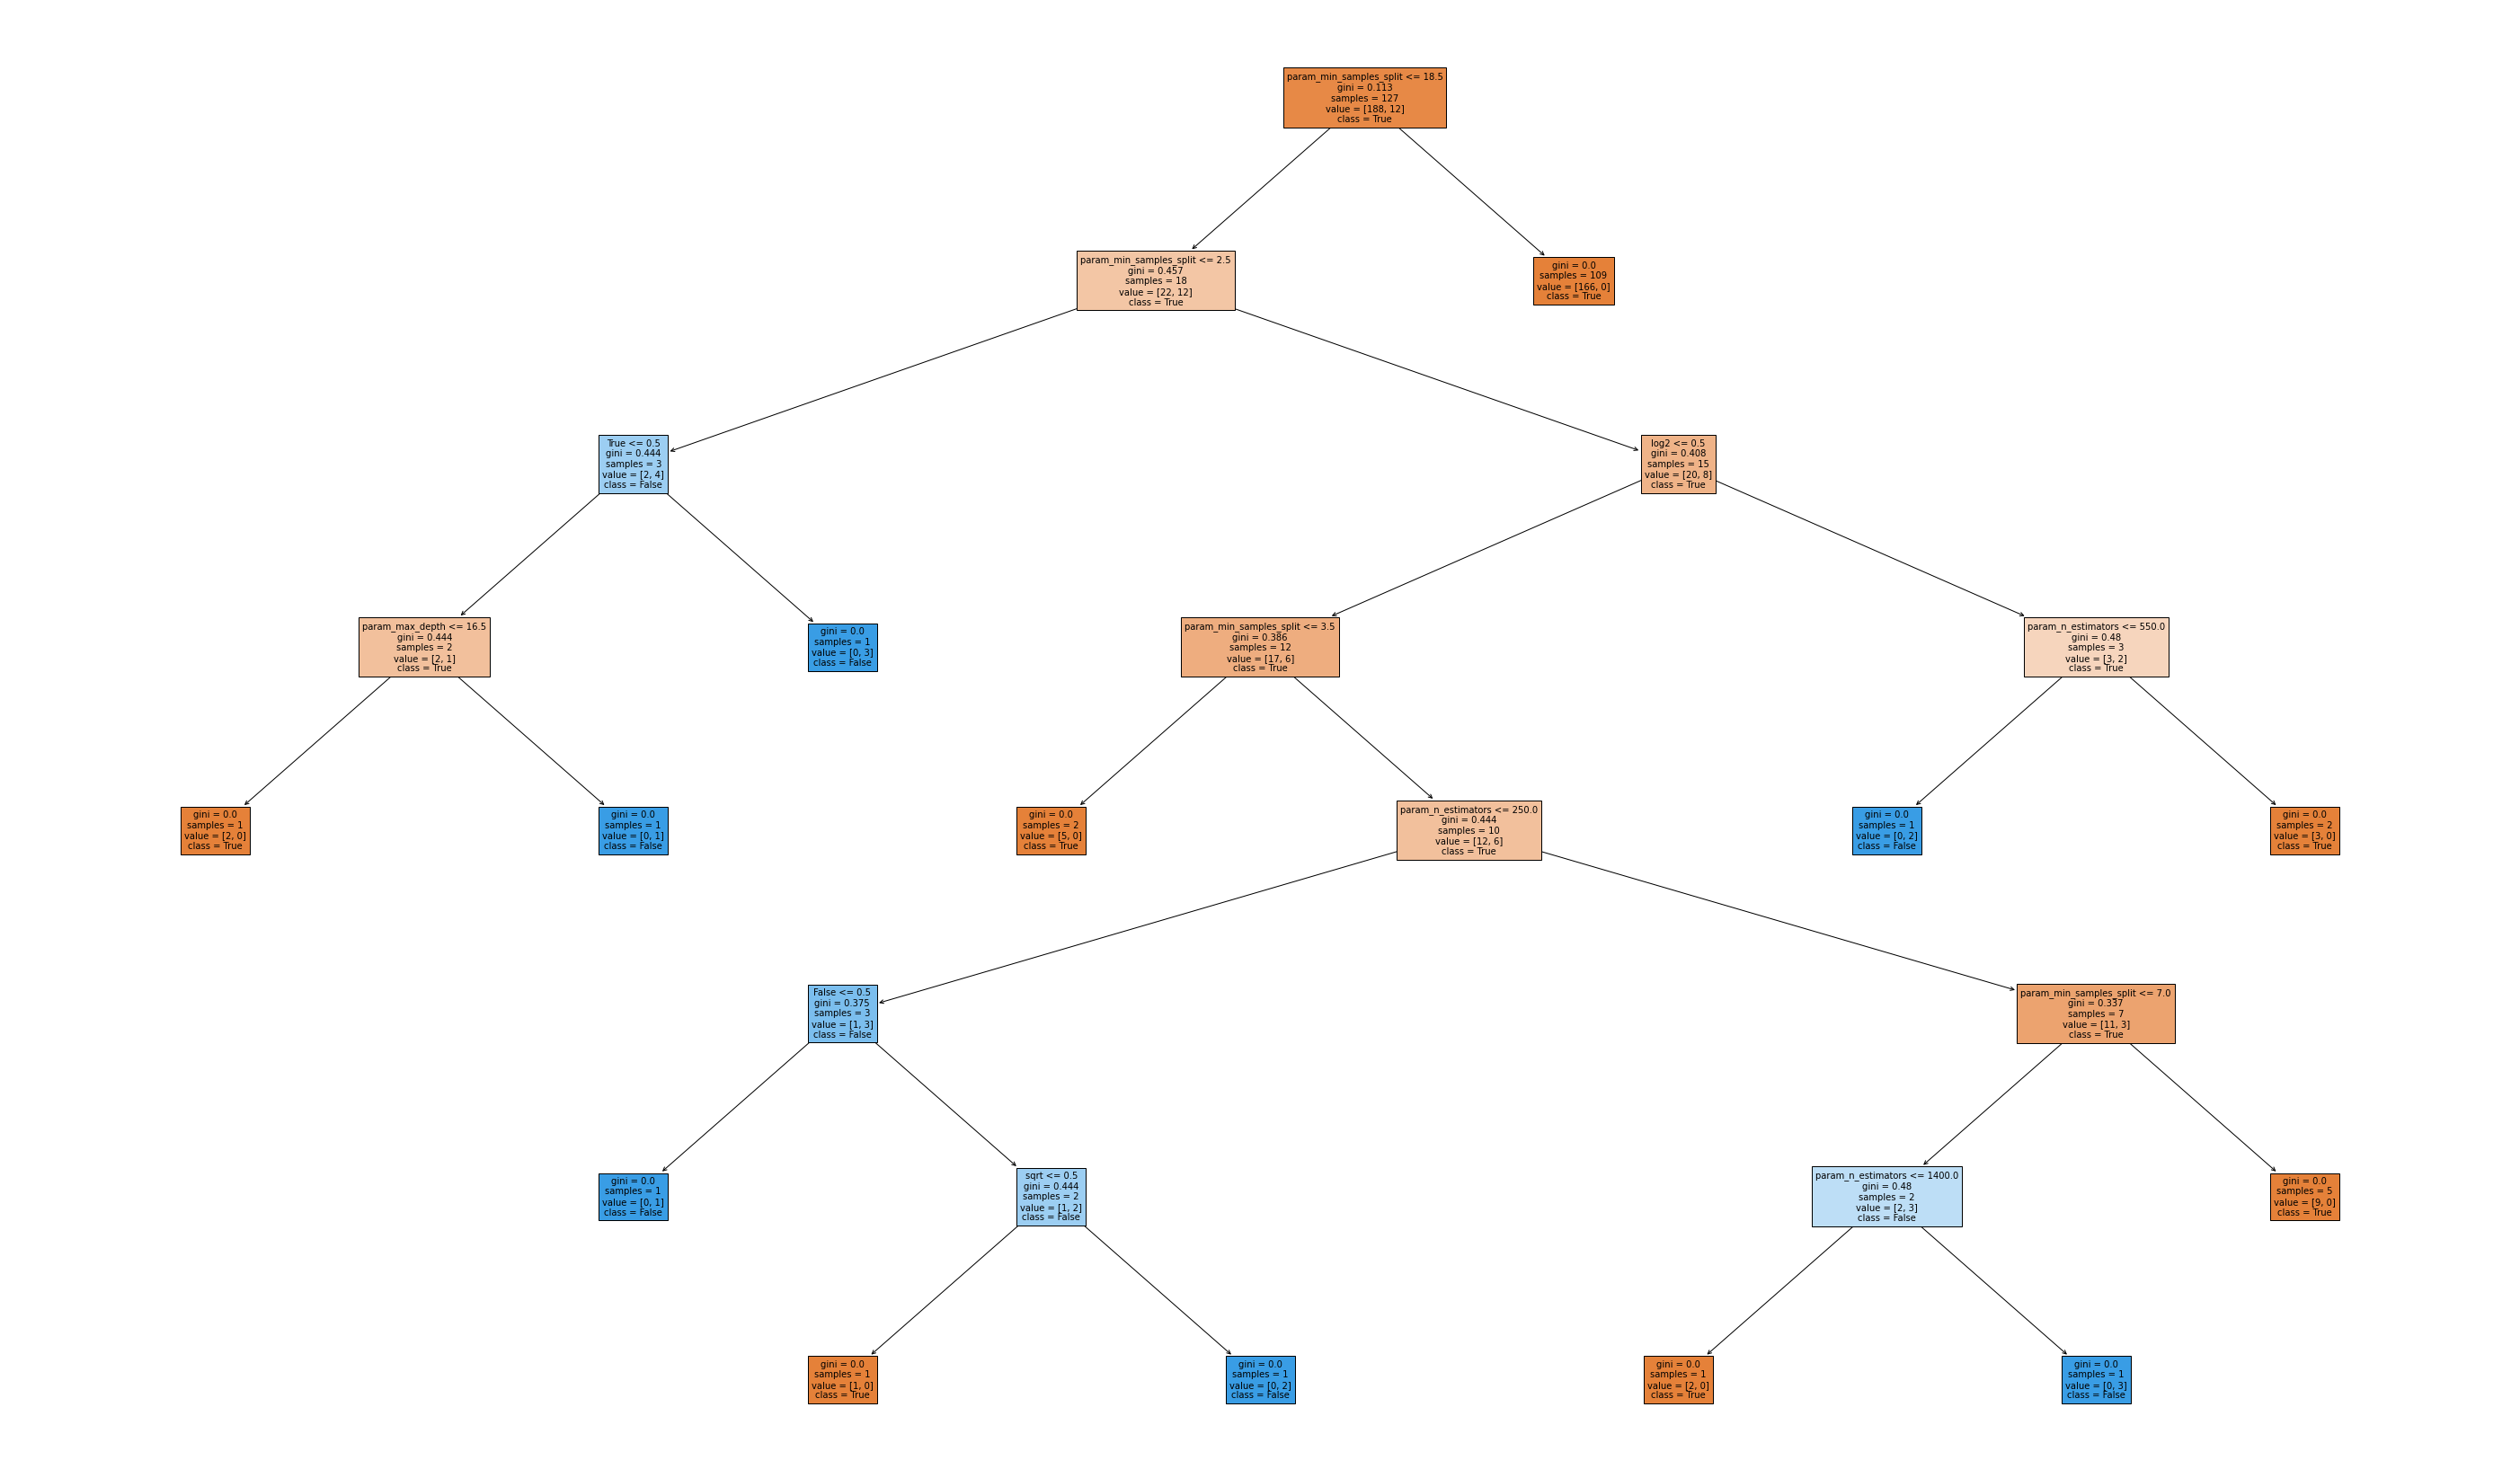

In [ ]:
from sklearn.tree import plot_tree
plt.figure(figsize = (50,30))
plot_tree(forest.estimators_[0], feature_names = ["param_n_estimators","param_min_samples_split","param_max_depth","	auto","log2","sqrt","entropy","gini","log_loss","False","True"], class_names =["True", "False"],  filled = True, fontsize = 10)

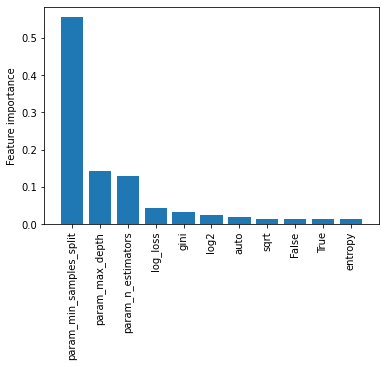

In [ ]:
forest = RandomForestClassifier(n_estimators=500, random_state=1)

def feature_wichtigkeit(forest, X_train, y_train, df ):
  forest.fit(X_train, y_train)
  importances = forest.feature_importances_

  indices = np.argsort(importances)[::-1]

  plt.ylabel('Feature importance')
  plt.bar(range(X_train.shape[1]), 
          importances[indices],
          align='center')

  feat_labels = df.columns
  plt.xticks(range(X_train.shape[1]), 
            feat_labels[indices], rotation=90)

  plt.xlim([-1, X_train.shape[1]])

feature_wichtigkeit(forest = forest, X_train = encoded_features, y_train= target, df = encoded_features)

### Valdiation Random Forest

In [ ]:
# zwei modelle durch RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

model1 = RandomForestClassifier(bootstrap='True', max_depth=16, max_features='log2', n_estimators=1150)
model2 = RandomForestClassifier(bootstrap='False', max_depth=16, min_samples_split=4,n_estimators=1600)

In [ ]:
# cross validatino with AUC
from sklearn.model_selection import cross_val_score

scores1 = cross_val_score(model1, X_main, y_main, scoring = "roc_auc_ovr", cv = 10)
scores2 = cross_val_score(model2, X_main, y_main, scoring = "roc_auc_ovr", cv = 10)

scores1.mean(), scores2.mean() 

(0.893211462450593, 0.8924110671936759)

[[33  1  3 10  9]
 [ 0 52  2  2  2]
 [ 7  7 29 14  1]
 [ 9  6 10 31  3]
 [ 4  0  0  6 47]]
[[35  1  4  8  8]
 [ 0 52  3  1  2]
 [ 9  7 28 13  1]
 [11  5 10 31  2]
 [ 4  0  0  5 48]]


(None,
 None,
 <matplotlib.image.AxesImage at 0x7f3a205191d0>)

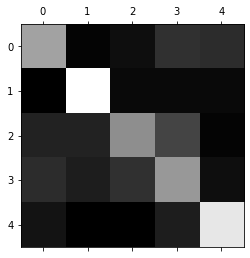

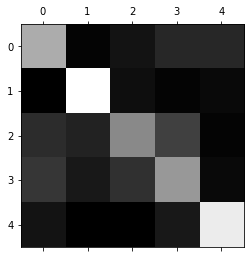

In [ ]:
# confusion metrics
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

predictions1= cross_val_predict(model1,X_main, y_main, cv = 10)

predictions2= cross_val_predict(model2,X_main, y_main, cv = 10)

conf_matrix1 = confusion_matrix(y_main,predictions1)
conf_matrix2 = confusion_matrix(y_main,predictions2)

print(conf_matrix1), plt.matshow(conf_matrix1, cmap = plt.cm.gray), print(conf_matrix2), plt.matshow(conf_matrix2, cmap = plt.cm.gray)

In [ ]:
#classification report

from sklearn.metrics import classification_report

report1 = classification_report(y_main,predictions1)
report2 = classification_report(y_main,predictions2)
print(report1), print(report2)

              precision    recall  f1-score   support

           0       0.62      0.59      0.61        56
           1       0.79      0.90      0.84        58
           2       0.66      0.50      0.57        58
           3       0.49      0.53      0.51        59
           4       0.76      0.82      0.79        57

    accuracy                           0.67       288
   macro avg       0.66      0.67      0.66       288
weighted avg       0.66      0.67      0.66       288

              precision    recall  f1-score   support

           0       0.59      0.62      0.61        56
           1       0.80      0.90      0.85        58
           2       0.62      0.48      0.54        58
           3       0.53      0.53      0.53        59
           4       0.79      0.84      0.81        57

    accuracy                           0.67       288
   macro avg       0.67      0.67      0.67       288
weighted avg       0.67      0.67      0.67       288



(None, None)

### Compare RandomForestClassifier and ExtraTreesClassifier

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
# zwei modelle durch RandomizedSearchCV --> Die selben wie RandomForest
from sklearn.ensemble import RandomForestClassifier

model1 = ExtraTreesClassifier(bootstrap='True', max_depth=16, max_features='log2', n_estimators=1150)
model2 = ExtraTreesClassifier(bootstrap='False', max_depth=16, min_samples_split=4,n_estimators=1600)

In [ ]:
# cross validatino with AUC
from sklearn.model_selection import cross_val_score

scores1 = cross_val_score(model1, X_main, y_main, scoring = "roc_auc_ovr", cv = 10)
scores2 = cross_val_score(model2, X_main, y_main, scoring = "roc_auc_ovr", cv = 10)

scores1.mean(), scores2.mean() 

(0.8830270092226614, 0.8863386034255599)

[[33  3  5  8  7]
 [ 0 49  3  2  4]
 [ 9 10 26 13  0]
 [10  6 13 28  2]
 [ 4  0  2  6 45]]
[[30  3  6  8  9]
 [ 0 51  2  2  3]
 [ 9 10 27 12  0]
 [11  7  9 29  3]
 [ 3  0  2  5 47]]


(None,
 None,
 <matplotlib.image.AxesImage at 0x7f3a1ddfee10>)

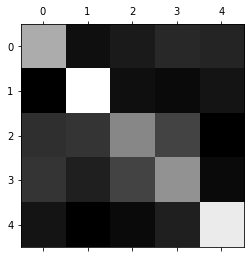

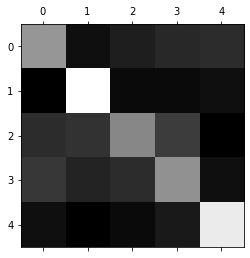

In [ ]:
# confusion metrics
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

predictions1= cross_val_predict(model1,X_main, y_main, cv = 10)

predictions2= cross_val_predict(model2,X_main, y_main, cv = 10)

conf_matrix1 = confusion_matrix(y_main,predictions1)
conf_matrix2 = confusion_matrix(y_main,predictions2)

print(conf_matrix1), plt.matshow(conf_matrix1, cmap = plt.cm.gray), print(conf_matrix2), plt.matshow(conf_matrix2, cmap = plt.cm.gray)

In [ ]:
#classification report

from sklearn.metrics import classification_report

report1 = classification_report(y_main,predictions1)
report2 = classification_report(y_main,predictions2)
print(report1), print(report2)

              precision    recall  f1-score   support

           0       0.59      0.59      0.59        56
           1       0.72      0.84      0.78        58
           2       0.53      0.45      0.49        58
           3       0.49      0.47      0.48        59
           4       0.78      0.79      0.78        57

    accuracy                           0.63       288
   macro avg       0.62      0.63      0.62       288
weighted avg       0.62      0.63      0.62       288

              precision    recall  f1-score   support

           0       0.57      0.54      0.55        56
           1       0.72      0.88      0.79        58
           2       0.59      0.47      0.52        58
           3       0.52      0.49      0.50        59
           4       0.76      0.82      0.79        57

    accuracy                           0.64       288
   macro avg       0.63      0.64      0.63       288
weighted avg       0.63      0.64      0.63       288



(None, None)

## SVM

### Hyperparameter Tuning SVM

In [ ]:
pip install scikit-optimize

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 100 kB 9.6 MB/s 


In [ ]:
nicht ausführen

In [ ]:
from sklearn.svm import SVC
from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer
grid_model = SVC()

hyperparameter = [
    {"C": Real(1e-6, 1e+6, prior="log-uniform"),
     "gamma": Real(1e-6, 1e+1, prior='log-uniform'),
     "degree": Integer(1,8),
     "kernel": Categorical(["linear", "poly", "rbf", "sigmoid"]),
     "coef0": Real(1e-6, 1e+6, prior="log-uniform"),
     }
]

grid_search = BayesSearchCV(estimator = grid_model, search_spaces =hyperparameter, n_iter = 50, scoring = "accuracy", cv = 5, return_train_score= True )

grid_search.fit(X_train, y_train)
grid_search.best_estimator_, grid_search.cv_results_

(SVC(C=1.3657641937120095e-05, coef0=16.328248051404472, degree=4,
     gamma=1.3485809905928439, kernel='poly'),
 {'mean_fit_time': array([0.01160064, 0.01785579, 0.00949054, 0.01365433, 0.010495  ,
         0.00685191, 0.01039662, 0.00717058, 0.00621195, 0.0082809 ,
         0.01380067, 0.01448607, 0.01389127, 0.00872908, 0.01238847,
         0.02771945, 0.00577803, 0.00799341, 0.01224456, 0.00541449,
         0.0115788 , 0.00802941, 0.01160922, 0.00736651, 0.01400499,
         0.00822396, 0.00874224, 0.01281986, 0.01516852, 0.01314597,
         0.01401978, 0.01409707, 0.01224589, 0.00696473, 0.00633206,
         0.01466889, 0.00616279, 0.01220489, 0.00704432, 0.01322207,
         0.01257944, 0.00694976, 0.00772371, 0.01481037, 0.01338177,
         0.00891628, 0.01253395, 0.0070714 , 0.01243629, 0.00702639]),
  'std_fit_time': array([0.00055067, 0.00163985, 0.00081221, 0.00102831, 0.00142879,
         0.00254598, 0.00094408, 0.00147121, 0.00165055, 0.00020301,
         0.00568265, 0.

In [ ]:
#model1 = grid_search.best_estimator_
model1 = SVC(C=1.3657641937120095e-05, coef0=16.328248051404472, degree=4, gamma=1.3485809905928439, kernel='poly')

In [ ]:
from sklearn.svm import SVC
from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer
grid_model = SVC()

hyperparameter = [
    {"C": Real(1e-6, 1e+6, prior="log-uniform"),
     "gamma": Real(1e-6, 1e+1, prior='log-uniform'),
     "degree": Integer(1,8),
     "kernel": Categorical(["linear", "poly", "rbf", "sigmoid"]),
     "coef0": Real(1e-6, 1e+6, prior="log-uniform"),
     }
]

grid_search = BayesSearchCV(estimator = grid_model, search_spaces =hyperparameter, scoring = "accuracy", cv = 5, return_train_score= True )

grid_search.fit(X_train, y_train)
grid_search.best_estimator_, grid_search.cv_results_

(SVC(C=11.328144307970293, coef0=33.486026862258015, degree=7,
     gamma=3.5878859179183764, kernel='poly'),
 {'mean_fit_time': array([0.028684  , 0.02624588, 0.01414156, 0.03935204, 0.02325311,
         0.06266341, 0.01538076, 0.01935186, 0.02281146, 0.05384707,
         0.01472235, 0.05769439, 0.00387645, 0.02741141, 0.0190536 ,
         0.02691164, 0.01826634, 0.00797715, 0.02438993, 0.01870141,
         0.03115473, 0.02767243, 0.00389314, 0.02406926, 0.0154995 ,
         0.02572041, 0.02866216, 0.00920658, 0.02959604, 0.01857471,
         0.02633758, 0.00805726, 0.01782355, 0.01750083, 0.02710519,
         0.01568995, 0.02734747, 0.02444134, 0.02574868, 0.02505193,
         0.01919732, 0.01817555, 0.02616515, 0.02644105, 0.00953059,
         0.0279007 , 0.02861819, 0.01784716, 0.01018319, 0.02855625]),
  'std_fit_time': array([0.01386196, 0.01011604, 0.00243294, 0.02491547, 0.01013166,
         0.01729967, 0.00393194, 0.0079892 , 0.01452006, 0.01523675,
         0.00184067, 0.0107

In [ ]:
#model2 = grid_search.best_estimator_
model2 = SVC(C=11.328144307970293, coef0=33.486026862258015, degree=7,gamma=3.5878859179183764, kernel='poly')

In [ ]:
from sklearn.svm import SVC
from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer
grid_model = SVC()

hyperparameter = [
    {"C": Real(1e-4, 1e+4, prior="log-uniform"),
     "gamma": Real(1e-6, 1e+1, prior='log-uniform'),
     "degree": Integer(1,8),
     "kernel": Categorical([ "poly", "rbf", "sigmoid"]),
     "coef0": Real(1e-4, 1e+4, prior="log-uniform"),
     }
]

grid_search = BayesSearchCV(estimator = grid_model, search_spaces =hyperparameter, scoring = "accuracy", cv = 3, return_train_score= True )

grid_search.fit(X_train, y_train)
grid_search.best_estimator_, grid_search.cv_results_

(SVC(C=23.687185307615824, coef0=0.11482405033475557, degree=5,
     gamma=0.004612829415920242),
 {'mean_fit_time': array([0.00771475, 0.00889413, 0.00884676, 0.01373887, 0.00796247,
         0.00787703, 0.00980115, 0.0152057 , 0.00772754, 0.00783761,
         0.01135588, 0.01036024, 0.02054954, 0.01937048, 0.02495058,
         0.01302155, 0.01891375, 0.00653092, 0.00954111, 0.02230032,
         0.00650318, 0.01789482, 0.01185052, 0.01311811, 0.02640589,
         0.0083952 , 0.00803153, 0.00729775, 0.0076104 , 0.00845615,
         0.00847125, 0.00958069, 0.01182469, 0.00813619, 0.00870379,
         0.0088822 , 0.00910799, 0.00860421, 0.00689379, 0.00698217,
         0.00864546, 0.00848524, 0.0084993 , 0.01029396, 0.00832049,
         0.00839782, 0.00945258, 0.00984979, 0.00826613, 0.00855041]),
  'std_fit_time': array([8.51018100e-04, 2.05649776e-03, 1.34977155e-03, 4.90617974e-04,
         8.36691837e-05, 2.96604744e-04, 1.36696066e-03, 9.29593282e-04,
         1.63591093e-04, 6.6304

In [ ]:
model3 =SVC(C=23.687185307615824, coef0=0.11482405033475557, degree=5, gamma=0.004612829415920242)

In [ ]:
df = pd.DataFrame(grid_search.cv_results_)
df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_coef0,param_degree,param_gamma,param_kernel,params,...,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score,rank_train_score
0,0.007715,0.000851,0.003886,0.000096,0.00075,1.22027,5,0.00012,poly,"{'C': 0.0007495869317762863, 'coef0': 1.220269...",...,0.368421,0.287309,0.071335,46,0.209150,0.385621,0.344156,0.312976,0.075342,47
1,0.008894,0.002056,0.007170,0.001673,0.529515,0.055457,3,0.02225,rbf,"{'C': 0.5295149386324364, 'coef0': 0.055456947...",...,0.578947,0.608567,0.023476,41,0.745098,0.784314,0.811688,0.780367,0.027328,42
2,0.008847,0.001350,0.006224,0.001573,0.007297,0.09538,7,0.113267,rbf,"{'C': 0.00729675784173981, 'coef0': 0.09537971...",...,0.289474,0.273980,0.059341,47,0.209150,0.581699,0.409091,0.399980,0.152229,45
3,0.013739,0.000491,0.004632,0.001243,0.411571,300.235731,8,0.002749,poly,"{'C': 0.4115711385783825, 'coef0': 300.2357306...",...,0.631579,0.678059,0.034534,31,1.000000,1.000000,1.000000,1.000000,0.000000,1
4,0.007962,0.000084,0.005095,0.000120,0.036937,0.031873,8,0.010703,rbf,"{'C': 0.03693731810518834, 'coef0': 0.03187331...",...,0.381579,0.317669,0.086902,44,0.209150,0.431373,0.396104,0.345542,0.097513,46
5,0.007877,0.000297,0.005101,0.000121,0.13074,23.42502,8,0.015024,rbf,"{'C': 0.13074016163891486, 'coef0': 23.4250195...",...,0.513158,0.495728,0.013417,42,0.555556,0.588235,0.538961,0.560917,0.020470,43
6,0.009801,0.001367,0.003749,0.000229,0.069254,0.001399,6,0.001085,poly,"{'C': 0.06925355064118874, 'coef0': 0.00139897...",...,0.618421,0.656357,0.028844,39,0.862745,0.875817,0.889610,0.876057,0.010969,41
7,0.015206,0.000930,0.004337,0.000876,0.067901,0.082388,2,4.499871,poly,"{'C': 0.06790106409831927, 'coef0': 0.08238754...",...,0.631579,0.682388,0.036316,28,1.000000,1.000000,1.000000,1.000000,0.000000,1
8,0.007728,0.000164,0.005183,0.000305,1.044312,1367.378824,7,0.000181,rbf,"{'C': 1.0443119157027152, 'coef0': 1367.378824...",...,0.407895,0.434666,0.024725,43,0.444444,0.490196,0.402597,0.445746,0.035774,44
9,0.007838,0.000663,0.004596,0.000114,420.663711,0.003077,5,0.000344,sigmoid,"{'C': 420.6637108558827, 'coef0': 0.0030770291...",...,0.118421,0.108738,0.042965,50,0.091503,0.052288,0.064935,0.069575,0.016343,50


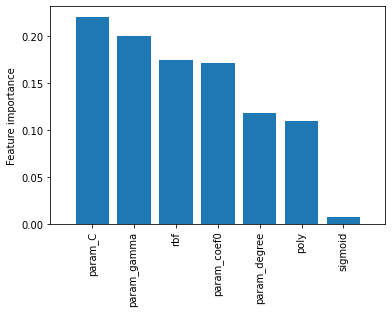

In [ ]:
# feature importance

from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
def feature_wichtigkeit(df, namensliste_numerischer_spalten, namensliste_kategorische_spalten, acc_grenze, n_estimators_von_forest = 500 ):
  # ENCODING VON KATEGORIE SPATLETN
  encoder = OneHotEncoder()
  encoded = encoder.fit_transform(df[namensliste_kategorische_spalten]).toarray()
  # kategoriespalten namen speichern
  kategorie_labels = np.hstack(encoder.categories_)
  # dataframe mit onehotencoding und den spaltennamen erstellen

  # ZUSAMMENFÜHREN KATEGORIE UND NUMERISCHE SPALTEN
  kategorie_spalten = pd.DataFrame(encoded, columns = kategorie_labels)
  numerische_spalten = df[namensliste_numerischer_spalten]
  feature = pd.concat(objs = [numerische_spalten, kategorie_spalten],axis=1)

  # BESTIMMUNG TARGET
  target = (df["mean_test_score"] >=acc_grenze )

  forest = RandomForestClassifier(n_estimators=n_estimators_von_forest, random_state=1)
  forest.fit(feature, target)
  importances = forest.feature_importances_

  indices = np.argsort(importances)[::-1]

  plt.ylabel('Feature importance')
  plt.bar(range(feature.shape[1]), 
          importances[indices],
          align='center')

  feat_labels = feature.columns
  plt.xticks(range(feature.shape[1]), feat_labels[indices], rotation=90)

  plt.xlim([-1, feature.shape[1]])


feature_wichtigkeit(df = df, namensliste_numerischer_spalten = ["param_C","param_coef0","param_degree","param_gamma"], namensliste_kategorische_spalten = ["param_kernel"], acc_grenze = 0.7)
# FAZIT: SIGMOID WEG

In [ ]:
from sklearn.svm import SVC
from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer
grid_model = SVC()

hyperparameter = [
    {"C": Real(1e-6, 1e+6, prior="log-uniform"),
     "gamma": Real(1e-6, 1e+1, prior='log-uniform'),
     "coef0": Real(1e-6, 1e+6, prior="log-uniform"),
     # nur rbf (also default wird getestet --> daher fällt auch degree weg, da rbf kein degree hat)
     }
]

grid_search = BayesSearchCV(estimator = grid_model, search_spaces =hyperparameter, n_iter = 70, scoring = "accuracy", cv = 3, return_train_score= True )

grid_search.fit(X_train, y_train)
grid_search.best_estimator_, grid_search.cv_results_

(SVC(C=4563.207069646265, coef0=1000000.0, gamma=0.04176401745194335),
 {'mean_fit_time': array([0.00531411, 0.00572371, 0.00517607, 0.00508833, 0.0061005 ,
         0.00450444, 0.00576806, 0.00507696, 0.00650223, 0.00591016,
         0.00535607, 0.00549777, 0.00569518, 0.00568573, 0.00673596,
         0.00753729, 0.00546384, 0.00816552, 0.00554784, 0.00516383,
         0.00481137, 0.00517495, 0.00729871, 0.00474207, 0.0056982 ,
         0.0058461 , 0.00560713, 0.00561619, 0.00865563, 0.00524664,
         0.00896899, 0.00426793, 0.00733487, 0.00469478, 0.00707301,
         0.0054915 , 0.00525077, 0.00622074, 0.00578856, 0.00565656,
         0.00566975, 0.00621446, 0.00428391, 0.00568215, 0.00611567,
         0.00841506, 0.00833106, 0.0057044 , 0.00513077, 0.00618132,
         0.00543451, 0.00552519, 0.00875664, 0.00698694, 0.00542935,
         0.00809463, 0.00656811, 0.00856233, 0.00559847, 0.00553385,
         0.00725079, 0.00559902, 0.00504947, 0.00485444, 0.00476003,
         0.0053

In [ ]:
#model4 = grid_search.best_estimator_
model4= SVC(C=4563.207069646265, coef0=1000000.0, gamma=0.04176401745194335)

In [ ]:
from sklearn.svm import SVC
from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer
grid_model = SVC()

hyperparameter = [
    {"C": Real(1e-6, 1e+6, prior="log-uniform"),
     "gamma": Real(1e-6, 1e+1, prior='log-uniform'),
     "coef0": Real(1e-6, 1e+6, prior="log-uniform"),
     # nur rbf (also default wird getestet --> daher fällt auch degree weg, da rbf kein degree hat)
     }
]

grid_search = BayesSearchCV(estimator = grid_model, search_spaces =hyperparameter, n_iter = 100, scoring = "accuracy", cv = 3, return_train_score= True )

grid_search.fit(X_train, y_train)
grid_search.best_estimator_, grid_search.cv_results_

(SVC(C=255416.77286183237, coef0=1e-06, gamma=0.04240868107164761),
 {'mean_fit_time': array([0.00506727, 0.0039525 , 0.00508587, 0.0051802 , 0.00429098,
         0.00585858, 0.00538476, 0.00508857, 0.00522248, 0.00508682,
         0.00698884, 0.00623337, 0.00598574, 0.00672738, 0.00521755,
         0.00837374, 0.00654761, 0.00489847, 0.00792178, 0.00707984,
         0.0079484 , 0.00579413, 0.00498112, 0.00411224, 0.00511599,
         0.00583863, 0.00483894, 0.00484594, 0.00678571, 0.00546908,
         0.004673  , 0.00766651, 0.00477703, 0.00523313, 0.00471282,
         0.00800165, 0.00482281, 0.00678698, 0.00469899, 0.0056839 ,
         0.00525173, 0.00698717, 0.00811084, 0.00557494, 0.00598828,
         0.00811156, 0.00563773, 0.00484228, 0.00571569, 0.00476893,
         0.00436322, 0.00603223, 0.00451358, 0.00490149, 0.00604916,
         0.00519617, 0.00605861, 0.00596094, 0.00601411, 0.00510359,
         0.00414435, 0.00511034, 0.00580597, 0.00582393, 0.00459846,
         0.0049565

In [ ]:
# model5 = grid_search.best_estimator_
model5 = SVC(C=255416.77286183237, coef0=1e-06, gamma=0.04240868107164761)

In [ ]:
from sklearn.experimental import enable_halving_search_cv 
from sklearn.model_selection import HalvingRandomSearchCV
from sklearn.svm import SVC

grid_model = SVC()

hyperparameter = [
     {
      "C": np.arange(1e-6, 1e+6),
     "gamma": np.arange(1e-6, 1e+6),
     "degree": np.arange(1, 8),
     "kernel": ["poly"],
     "coef0": np.arange(1e-6, 1e+6)
     }, 
     {
      "C": np.arange(1e-6, 1e+6),
     "gamma": np.arange(1e-6, 1e+6),
     "coef0": np.arange(1e-6, 1e+6),
     }
]

grid_search = HalvingRandomSearchCV(estimator = grid_model, param_distributions =hyperparameter, scoring = "accuracy", cv = 4, return_train_score= True )

grid_search.fit(X_train, y_train)

HalvingRandomSearchCV(cv=4, estimator=SVC(),
                      param_distributions=[{'C': array([1.000000e-06, 1.000001e+00, 2.000001e+00, ..., 9.999970e+05,
       9.999980e+05, 9.999990e+05]),
                                            'coef0': array([1.000000e-06, 1.000001e+00, 2.000001e+00, ..., 9.999970e+05,
       9.999980e+05, 9.999990e+05]),
                                            'degree': array([1, 2, 3, 4, 5, 6, 7]),
                                            'gamma': array([1.000000e-06, 1.000001e+00, 2.000001e+00, ..., 9...
       9.999980e+05, 9.999990e+05]),
                                            'kernel': ['poly']},
                                           {'C': array([1.000000e-06, 1.000001e+00, 2.000001e+00, ..., 9.999970e+05,
       9.999980e+05, 9.999990e+05]),
                                            'coef0': array([1.000000e-06, 1.000001e+00, 2.000001e+00, ..., 9.999970e+05,
       9.999980e+05, 9.999990e+05]),
                                 

In [ ]:
#model = grid_search.best_estimator_
model6 = SVC(C=912483.0000009999, coef0=412216.00000099995, degree=5, gamma=257049.00000099998, kernel='poly', probability=True)

AUC scores: 
 0.929009881422925
Classification report: 
               precision    recall  f1-score   support

           0       0.61      0.66      0.63        56
           1       0.81      0.90      0.85        58
           2       0.69      0.60      0.64        58
           3       0.54      0.58      0.56        59
           4       0.84      0.72      0.77        57

    accuracy                           0.69       288
   macro avg       0.70      0.69      0.69       288
weighted avg       0.70      0.69      0.69       288

Confusion Matrix: 
 [[37  0  3 11  5]
 [ 0 52  3  2  1]
 [ 4  8 35  9  2]
 [13  4  8 34  0]
 [ 7  0  2  7 41]]


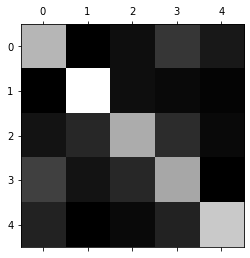

In [ ]:
from sklearn.model_selection import cross_val_score

#import für confusion metrics
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

#import classification report
from sklearn.metrics import classification_report 

def validate(model):
  # AUC
  scores = cross_val_score(model, X_main, y_main, scoring = "roc_auc_ovr", cv = 10)

  # Confusion Matirx
  predictions= cross_val_predict(model,X_main, y_main, cv = 10)
  conf_matrix = confusion_matrix(y_main,predictions)

  # Report für recall/precision/accuracy/f1
  report = classification_report(y_main,predictions)

  # print alles
  print("AUC scores: \n", scores.mean())
  print("Classification report: \n", report)
  print("Confusion Matrix: \n", conf_matrix)
  plt.matshow(conf_matrix, cmap = plt.cm.gray)

validate(model)

### Validation SVM

In [ ]:
# modelle von hyperparameter tuning
from sklearn.svm import SVC
model1 = SVC(C=1.3657641937120095e-05, coef0=16.328248051404472, degree=4, gamma=1.3485809905928439, kernel='poly', probability=True)
model2 = SVC(C=11.328144307970293, coef0=33.486026862258015, degree=7,gamma=3.5878859179183764, kernel='poly', probability=True)
model3 =SVC(C=23.687185307615824, coef0=0.11482405033475557, degree=5, gamma=0.004612829415920242, probability=True)
model4= SVC(C=4563.207069646265, coef0=1000000.0, gamma=0.04176401745194335,probability=True)
model5 = SVC(C=255416.77286183237, coef0=1e-06, gamma=0.04240868107164761,probability=True)

AUC scores: 
 0.9298300395256917
Classification report: 
               precision    recall  f1-score   support

           0       0.61      0.70      0.65        56
           1       0.84      0.91      0.88        58
           2       0.70      0.69      0.70        58
           3       0.59      0.58      0.58        59
           4       0.85      0.68      0.76        57

    accuracy                           0.71       288
   macro avg       0.72      0.71      0.71       288
weighted avg       0.72      0.71      0.71       288

Confusion Matrix: 
 [[39  0  3  9  5]
 [ 0 53  3  2  0]
 [ 2  6 40  8  2]
 [13  4  8 34  0]
 [10  0  3  5 39]]


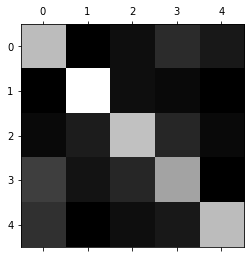

In [ ]:
#import für cross validatino with AUC
from sklearn.model_selection import cross_val_score

#import für confusion metrics
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

#import classification report
from sklearn.metrics import classification_report 

def validate(model):
  # AUC
  scores = cross_val_score(model, X_main, y_main, scoring = "roc_auc_ovr", cv = 10)

  # Confusion Matirx
  predictions= cross_val_predict(model,X_main, y_main, cv = 10)
  conf_matrix = confusion_matrix(y_main,predictions)

  # Report für recall/precision/accuracy/f1
  report = classification_report(y_main,predictions)

  # print alles
  print("AUC scores: \n", scores.mean())
  print("Classification report: \n", report)
  print("Confusion Matrix: \n", conf_matrix)
  plt.matshow(conf_matrix, cmap = plt.cm.gray)

validate(model1)


AUC scores: 
 0.9290303030303031
Classification report: 
               precision    recall  f1-score   support

           0       0.60      0.59      0.59        56
           1       0.83      0.90      0.86        58
           2       0.67      0.62      0.64        58
           3       0.52      0.58      0.54        59
           4       0.84      0.74      0.79        57

    accuracy                           0.68       288
   macro avg       0.69      0.68      0.69       288
weighted avg       0.69      0.68      0.68       288

Confusion Matrix: 
 [[33  0  5 12  6]
 [ 0 52  3  3  0]
 [ 3  7 36 10  2]
 [13  4  8 34  0]
 [ 6  0  2  7 42]]


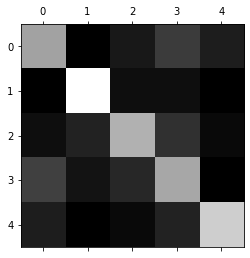

In [ ]:
validate(model2)

AUC scores: 
 0.8447523056653493
Classification report: 
               precision    recall  f1-score   support

           0       0.52      0.54      0.53        56
           1       0.68      0.84      0.75        58
           2       0.55      0.47      0.50        58
           3       0.49      0.47      0.48        59
           4       0.73      0.67      0.70        57

    accuracy                           0.60       288
   macro avg       0.59      0.60      0.59       288
weighted avg       0.59      0.60      0.59       288

Confusion Matrix: 
 [[30  2  6 11  7]
 [ 0 49  4  2  3]
 [ 9 10 27  9  3]
 [10 10 10 28  1]
 [ 9  1  2  7 38]]


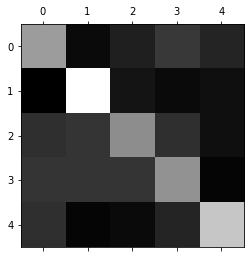

In [ ]:
validate(model3)

AUC scores: 
 0.9315158102766798
Classification report: 
               precision    recall  f1-score   support

           0       0.56      0.62      0.59        56
           1       0.83      0.91      0.87        58
           2       0.65      0.59      0.62        58
           3       0.54      0.54      0.54        59
           4       0.82      0.74      0.78        57

    accuracy                           0.68       288
   macro avg       0.68      0.68      0.68       288
weighted avg       0.68      0.68      0.68       288

Confusion Matrix: 
 [[35  0  4 10  7]
 [ 1 53  4  0  0]
 [ 6  8 34  9  1]
 [14  2 10 32  1]
 [ 6  1  0  8 42]]


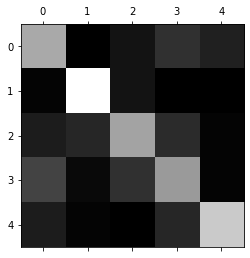

In [ ]:
validate(model4)

AUC scores: 
 0.9287648221343874
Classification report: 
               precision    recall  f1-score   support

           0       0.56      0.62      0.59        56
           1       0.83      0.91      0.87        58
           2       0.65      0.59      0.62        58
           3       0.54      0.54      0.54        59
           4       0.82      0.74      0.78        57

    accuracy                           0.68       288
   macro avg       0.68      0.68      0.68       288
weighted avg       0.68      0.68      0.68       288

Confusion Matrix: 
 [[35  0  4 10  7]
 [ 1 53  4  0  0]
 [ 6  8 34  9  1]
 [14  2 10 32  1]
 [ 6  1  0  8 42]]


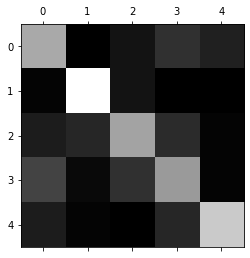

In [ ]:
validate(model5)

# CNN


In [ ]:
pip install keras-tuner --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 135 kB 5.1 MB/s 
     |████████████████████████████████| 1.6 MB 42.9 MB/s 


## Data Preprocessing

### Convert Datasets into tensors

In [ ]:
# convertiere alles in tensor 
import tensorflow as tf
from tensorflow import keras 
from sklearn.utils import shuffle
df = shuffle(df)

X_train = shuffle(X_train)
y_train = shuffle(y_train)
X_val = shuffle(X_val)
y_val = shuffle(y_val)
X_test = shuffle(X_test)
y_test = shuffle(y_test)

X_train = tf.constant(shuffle(X_train))
y_train = tf.constant(y_train)
X_val = tf.constant(X_val)
y_val = tf.constant(y_val)
X_test = tf.constant(X_test)
y_test = tf.constant(y_test)

for i in [X_train, y_train, X_val,y_val,X_test,y_test]:
  print(tf.shape(i))

tf.Tensor([230 180], shape=(2,), dtype=int32)
tf.Tensor([230], shape=(1,), dtype=int32)
tf.Tensor([ 58 180], shape=(2,), dtype=int32)
tf.Tensor([58], shape=(1,), dtype=int32)
tf.Tensor([ 72 180], shape=(2,), dtype=int32)
tf.Tensor([72], shape=(1,), dtype=int32)


### Create Datapipeline with tf.Data API (nicht durchlaufen lassen)

In [ ]:
# create tf.data.Dataset object
# vorgehen vorschlag

train_data = np.hstack(y_train, X_train)
train_data = tf.constant(train_data)
train_data = tf.data.Dataset.from_tensor_slices(train_data)

train_data  = train_data.repeat(5).shuffle(50).batch(20).prefetch(1) # 230 Kurven --repeat(5)---> 1150 Kurven --shuffle(50)---> 1150 Kurven gemischt --batch(20)---> 1150 gemischte Kurven in Gruppen der größe 20 aufgeteilt

train_data = train_data.as_numpy


TypeError: ignored

In [ ]:
# für keras tuner wird das model in einer Build methode geschrieben
from keras.models import Sequential
from keras.layers import InputLayer
"""from keras.layers import BatchNormalization
from keras.layers import Activation
from keras.layers import MaxPool2D
from keras.layers import Conv2D
from keras.layers import GlobalAvgPool2D
from keras.layers import Dense
from functools import partial"""

def build():
  # initialisiere Model
  model = Sequential()

  # hinzufügen von layer
  model.add(InputLayer())

# Model Aufbau

In [ ]:
from keras.models import Sequential
from keras.layers import InputLayer, Dense

def build():
  # initialisiere Model
  model = Sequential()

  # hinzufügen von layer
  model.add(InputLayer(input_shape=[180])) # mehr eintragen wenn ich mehr weis dtype bla bla
  model.add(Dense(units=5,activation="softmax")

In [ ]:
model.compile(loss = "sparse_categorical_crossentropy", optimizer = "adam", metrics = ["accuracy", "",""])
history = model.fit(X_train, y_train, epochs = , valdiation_data =(X_val,y_val), callbacks = [])
